<a href="https://colab.research.google.com/github/Custardwh1pp/GoogleColab_DL/blob/main/Saisyukadai_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Driveのマウント（Colab上で自分のデータにアクセスするための設定です）
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib as mpl

In [ ]:
PATH = '/content/drive/My Drive/GCI/'

df = pd.read_csv(PATH + 'data_I.csv')

In [ ]:

mpl.rcParams['font.family'] = 'DejaVu Sans' # 一般的なフォントを設定します。環境によっては 'sans-serif' も有効です。
mpl.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示します。


In [ ]:
print("データセットの最初の5行:")
print(df.head())

print("\nデータセットの基本情報:")
df.info()

print("\n欠損値の確認:")
print(df.isnull().sum())

print("\n数値列の基本統計量:")
print(df.describe())

データセットの最初の5行:
   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   
1          1  Life Sciences              1               2   
2          2          Other              1               4   
3          4  Life Sciences              1               5   
4          1        Medical              1               7   

   EnvironmentSatisfaction  ... RemoteWork  MonthlyIncome  StressRating  \
0                        2  ...          1         

In [ ]:
# Calculate the percentage of PerformanceIndex, sorted by PerformanceIndex in ascending order
attrition_counts = df['PerformanceIndex'].value_counts().sort_index(ascending=True)
attrition_percentage = (df['PerformanceIndex'].value_counts(normalize=True) * 100).sort_index(ascending=True)

print("PerformanceIndex Counts (Sorted Ascending):")
print(attrition_counts.to_markdown(numalign="left", stralign="left"))
print("\nPerformanceIndex Percentage (Sorted Ascending):")
print(attrition_percentage.to_markdown(numalign="left", stralign="left"))

# Analyze numerical features related to PerformanceIndex
numerical_features = [
    'MonthlyIncome',
    'YearsAtCompany',
    'TotalWorkingYears',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'DistanceFromHome',
    'MonthlyAchievement',
    'Incentive',
    'TrainingTimesLastYear'
]

# Calculate mean of numerical features by PerformanceIndex, sorted by PerformanceIndex in ascending order
print("\nMean of numerical features by PerformanceIndex (Sorted Ascending):")
print(df.groupby('PerformanceIndex')[numerical_features].mean().sort_index(ascending=True).to_markdown(numalign="left", stralign="left"))

# Analyze categorical features related to PerformanceIndex
categorical_features = [
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'StressRating',
    'PerformanceRating',
    'JobInvolvement',
    'Department',
    'JobRole',
    'MaritalStatus',
    'BusinessTravel',
    'Gender',
    'Education',
    'RemoteWork',
    'WelfareBenefits',
    'InHouseFacility',
    'ExternalFacility',
    'ExtendedLeave',
    'FlexibleWork'
]

for col in categorical_features:
    print(f"\nDistribution of {col} by PerformanceIndex (PerformanceIndex sorted Ascending):")
    # Sort columns (PerformanceIndex levels) in ascending order
    print(df.groupby(col)['PerformanceIndex'].value_counts(normalize=True).unstack().mul(100).sort_index(axis=1, ascending=True).to_markdown(numalign="left", stralign="left"))



PerformanceIndex Counts (Sorted Ascending):
| PerformanceIndex   | count   |
|:-------------------|:--------|
| 30                 | 19      |
| 31                 | 15      |
| 32                 | 24      |
| 33                 | 19      |
| 34                 | 12      |
| 35                 | 18      |
| 36                 | 18      |
| 37                 | 18      |
| 38                 | 13      |
| 39                 | 17      |
| 40                 | 18      |
| 41                 | 21      |
| 42                 | 28      |
| 43                 | 24      |
| 44                 | 18      |
| 45                 | 24      |
| 46                 | 25      |
| 47                 | 16      |
| 48                 | 28      |
| 49                 | 18      |
| 50                 | 16      |
| 51                 | 22      |
| 52                 | 26      |
| 53                 | 14      |
| 54                 | 26      |
| 55                 | 16      |
| 56                 | 26      |

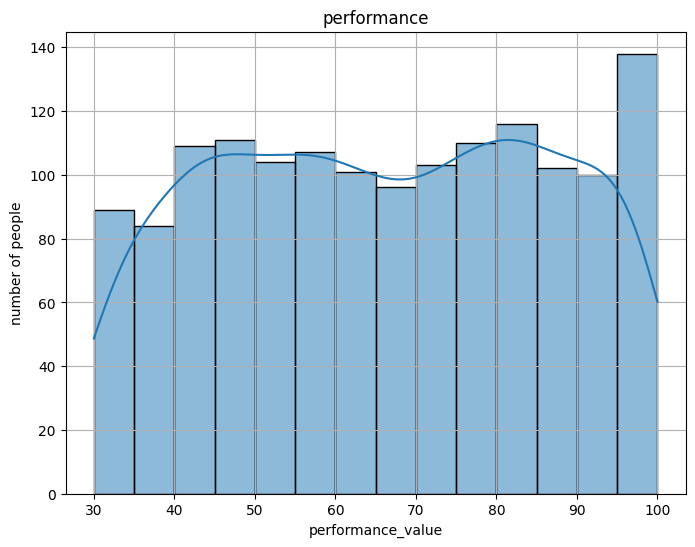

In [ ]:
# パフォーマンス指標の分布
plt.figure(figsize=(8, 6))
sns.histplot(df['PerformanceIndex'], bins=14, kde=True)
plt.title('performance')
plt.xlabel('performance_value')
plt.ylabel('number of people')
plt.grid(True)
plt.show()

/tmp/ipython-input-9-2200103197.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stacked = df.groupby(['PerformanceCategory','JobSatisfaction']).size().unstack(fill_value=0)


<Figure size 1200x700 with 0 Axes>

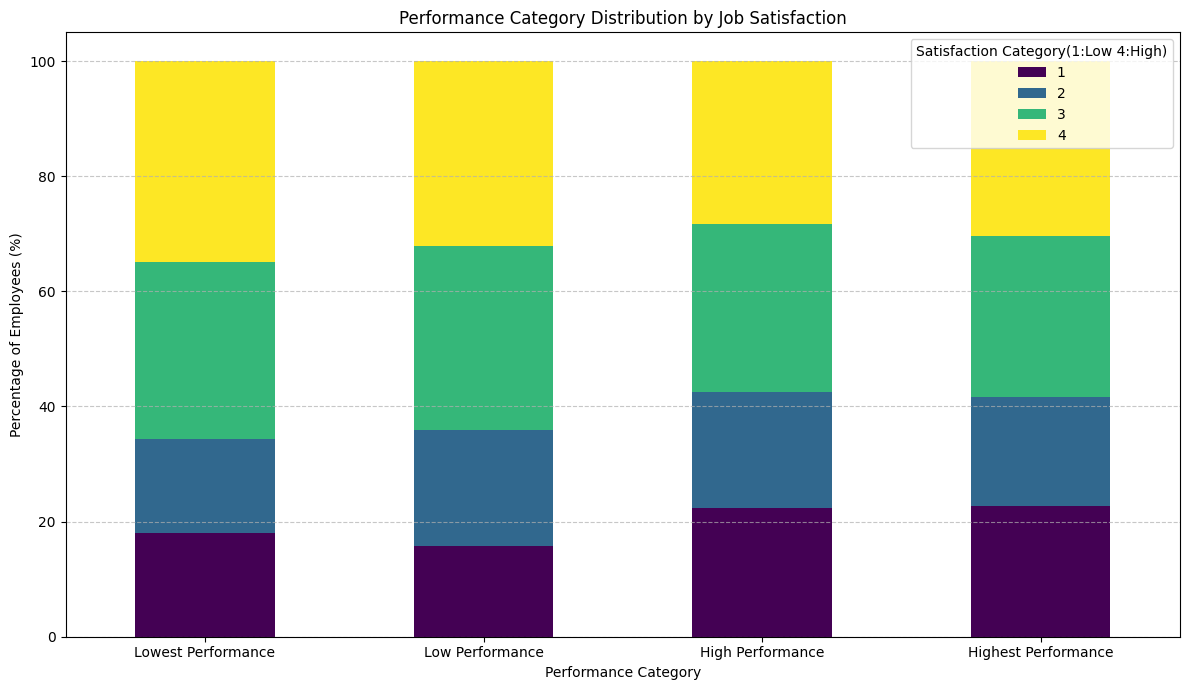

/tmp/ipython-input-9-2200103197.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stacked = df.groupby(['PerformanceCategory','WorkLifeBalance']).size().unstack(fill_value=0)


<Figure size 1200x700 with 0 Axes>

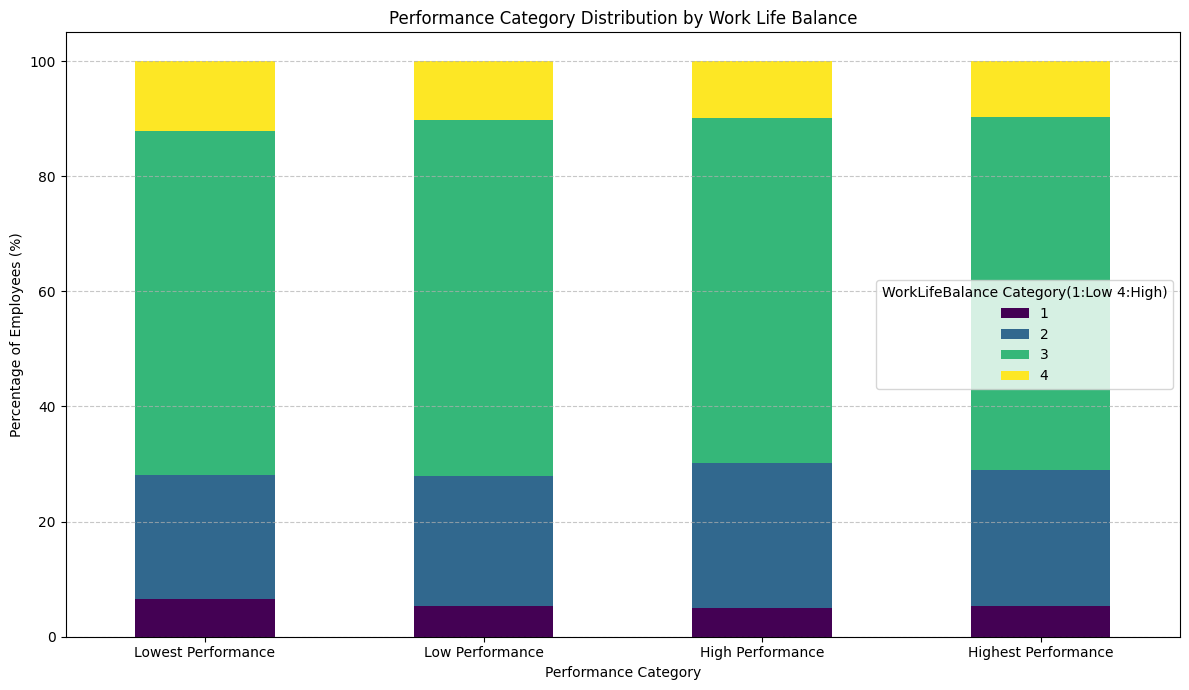

In [ ]:
# パフォーマンス指標をカテゴリにビン分割 (例: 低, 中, 高)
bins = [0, 45, 65, 85, 100] # パフォーマンス指標の範囲を定義
labels = ['Lowest Performance', 'Low Performance', 'High Performance', 'Highest Performance'] # 各ビンのラベル
df['PerformanceCategory'] = pd.cut(df['PerformanceIndex'], bins=bins, labels=labels, right=True)

# 仕事満足度別のパフォーマンスカテゴリ分布を積み上げ棒グラフで表示
plt.figure(figsize=(12, 7))
# 各JobSatisfactionレベルにおけるPerformanceCategoryの割合を計算
df_stacked = df.groupby(['PerformanceCategory','JobSatisfaction']).size().unstack(fill_value=0)
df_stacked_percent = df_stacked.div(df_stacked.sum(axis=1), axis=0) * 100

df_stacked_percent.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 7))
plt.title('Performance Category Distribution by Job Satisfaction') # 仕事満足度別のパフォーマンスカテゴリ分布
plt.xlabel('Performance Category') # 仕事満足度 (1:低い, 4:高い)
plt.ylabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.xticks(rotation=0) # X軸のラベルを回転させない
plt.legend(title='Satisfaction Category(1:Low 4:High)') # 凡例のタイトル
plt.grid(axis='y', linestyle='--', alpha=0.7) # Y軸にグリッド線を追加
plt.tight_layout()
plt.show()

# 仕事満足度別のパフォーマンスカテゴリ分布を積み上げ棒グラフで表示
plt.figure(figsize=(12, 7))
# 各JobSatisfactionレベルにおけるPerformanceCategoryの割合を計算
df_stacked = df.groupby(['PerformanceCategory','WorkLifeBalance']).size().unstack(fill_value=0)
df_stacked_percent = df_stacked.div(df_stacked.sum(axis=1), axis=0) * 100

df_stacked_percent.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 7))
plt.title('Performance Category Distribution by Work Life Balance') # 仕事満足度別のパフォーマンスカテゴリ分布
plt.xlabel('Performance Category') # 仕事満足度 (1:低い, 4:高い)
plt.ylabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.xticks(rotation=0) # X軸のラベルを回転させない
plt.legend(title='WorkLifeBalance Category(1:Low 4:High)') # 凡例のタイトル
plt.grid(axis='y', linestyle='--', alpha=0.7) # Y軸にグリッド線を追加
plt.tight_layout()
plt.show()

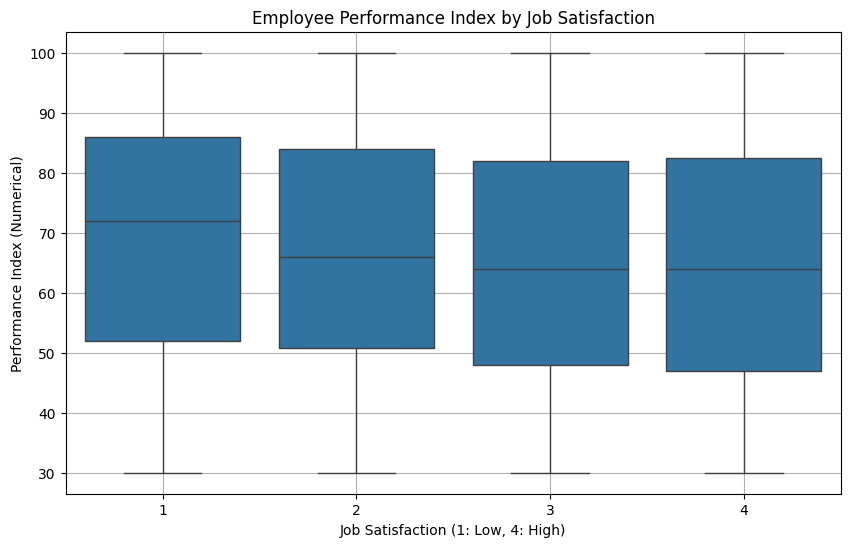

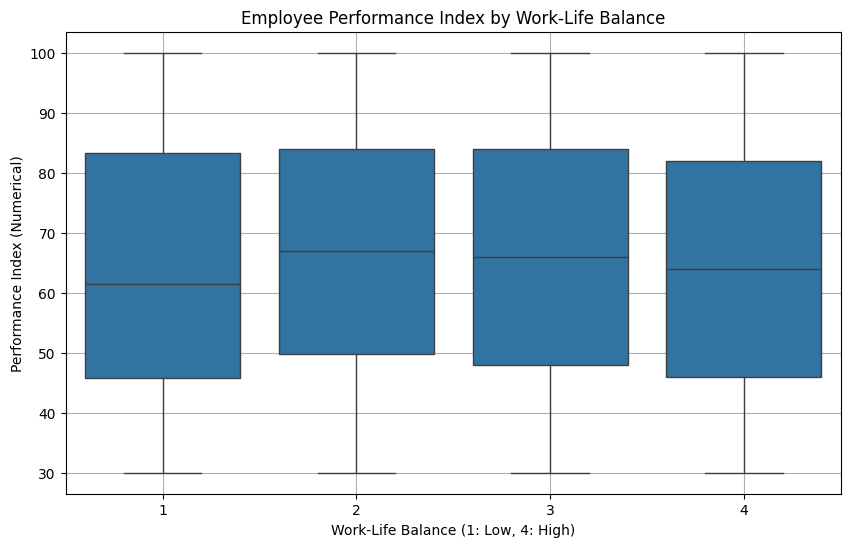

In [ ]:
# パフォーマンス指標と他の変数との関係を探る

# 仕事満足度別のパフォーマンス指標
# 仕事満足度 (1:低い, 4:高い) がパフォーマンス指標にどう影響するかをボックスプロットで比較します。
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Job Satisfaction') # 仕事満足度別の従業員パフォーマンス指標
plt.xlabel('Job Satisfaction (1: Low, 4: High)') # 仕事満足度 (1:低い, 4:高い)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# ワークライフバランス別のパフォーマンス指標
# ワークライフバランス (1:低い, 4:高い) がパフォーマンス指標にどう影響するかをボックスプロットで比較します。
plt.figure(figsize=(10, 6))
sns.boxplot(x='WorkLifeBalance', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Work-Life Balance') # ワークライフバランス別の従業員パフォーマンス指標
plt.xlabel('Work-Life Balance (1: Low, 4: High)') # ワークライフバランス (1:低い, 4:高い)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

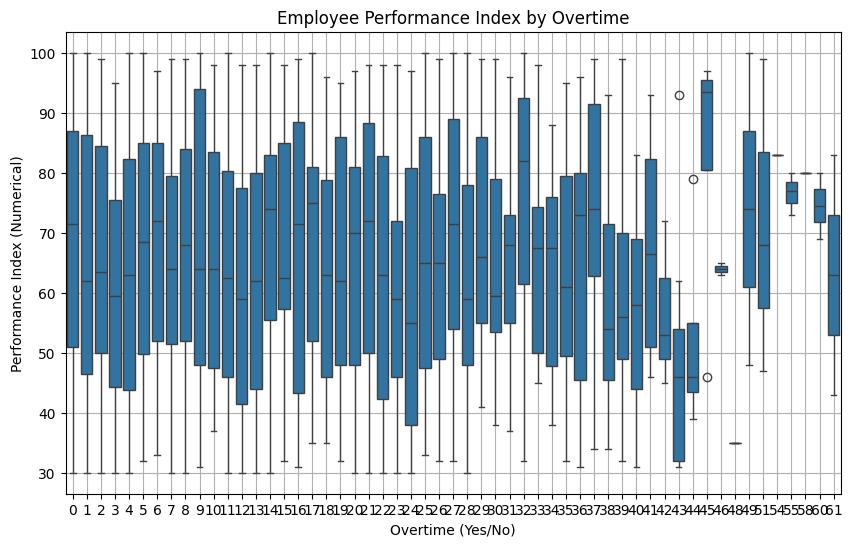

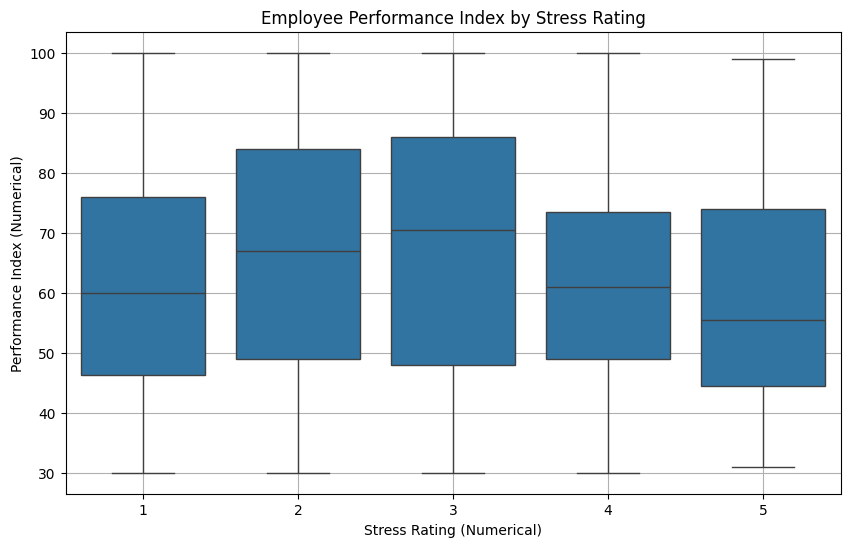

In [ ]:
# 残業の有無別のパフォーマンス指標
# 残業の有無 (Yes/No) がパフォーマンス指標にどう影響するかをボックスプロットで比較します。
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Overtime') # 残業の有無別の従業員パフォーマンス指標
plt.xlabel('Overtime (Yes/No)') # 残業の有無 (Yes:あり, No:なし)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# ストレス評価別のパフォーマンス指標
# ストレス評価がパフォーマンス指標にどう影響するかをボックスプロットで比較します。
plt.figure(figsize=(10, 6))
sns.boxplot(x='StressRating', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Stress Rating') # ストレス評価別の従業員パフォーマンス指標
plt.xlabel('Stress Rating (Numerical)') # ストレス評価 (数値)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

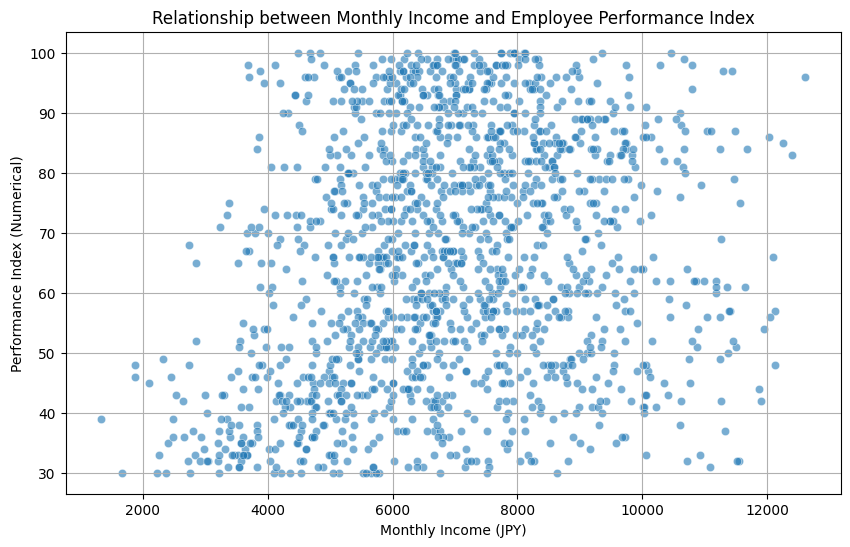

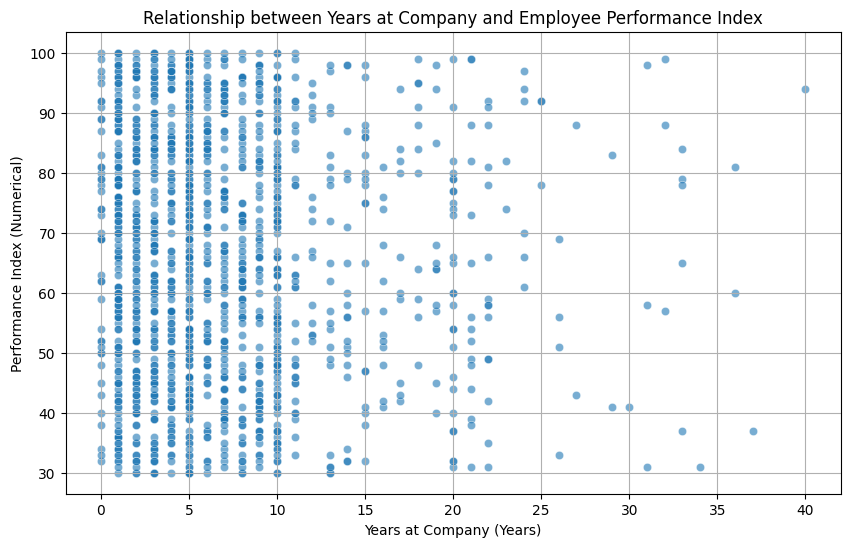

In [ ]:
# 月収とパフォーマンス指標の関係
# 月収とパフォーマンス指標の間に相関があるかを散布図で視覚化します。
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='PerformanceIndex', data=df, alpha=0.6)
plt.title('Relationship between Monthly Income and Employee Performance Index') # 月収と従業員パフォーマンス指標の関係
plt.xlabel('Monthly Income (JPY)') # 月収 (日本円)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 勤続年数とパフォーマンス指標の関係
# 勤続年数とパフォーマンス指標の間に相関があるかを散布図で視覚化します。
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='PerformanceIndex', data=df, alpha=0.6)
plt.title('Relationship between Years at Company and Employee Performance Index') # 勤続年数と従業員パフォーマンス指標の関係
plt.xlabel('Years at Company (Years)') # 勤続年数 (年)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

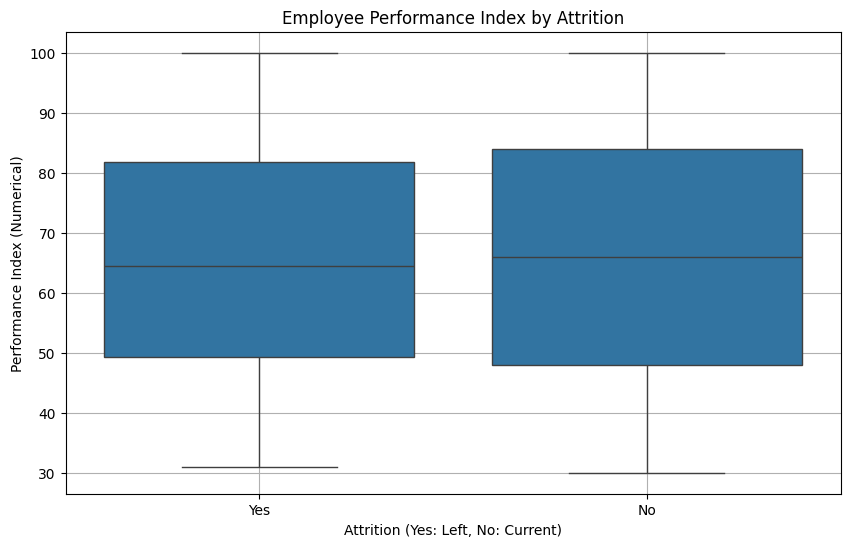

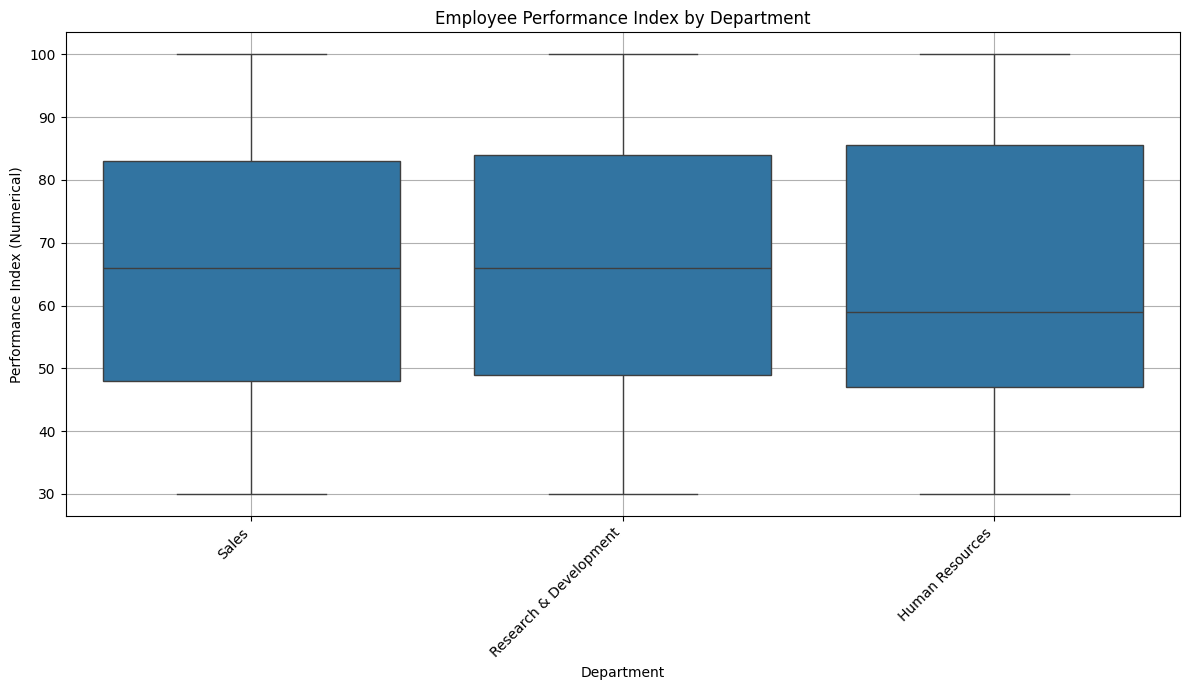

In [ ]:
# 離職の有無別のパフォーマンス指標
# 離職した従業員と在籍している従業員でパフォーマンス指標に違いがあるかをボックスプロットで比較します。
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Attrition') # 離職の有無別の従業員パフォーマンス指標
plt.xlabel('Attrition (Yes: Left, No: Current)') # 離職の有無 (Yes:離職, No:在籍)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 部門別のパフォーマンス指標
# 各部門のパフォーマンス指標の分布をボックスプロットで比較します。
plt.figure(figsize=(12, 7))
sns.boxplot(x='Department', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Department') # 部門別の従業員パフォーマンス指標
plt.xlabel('Department') # 部門
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

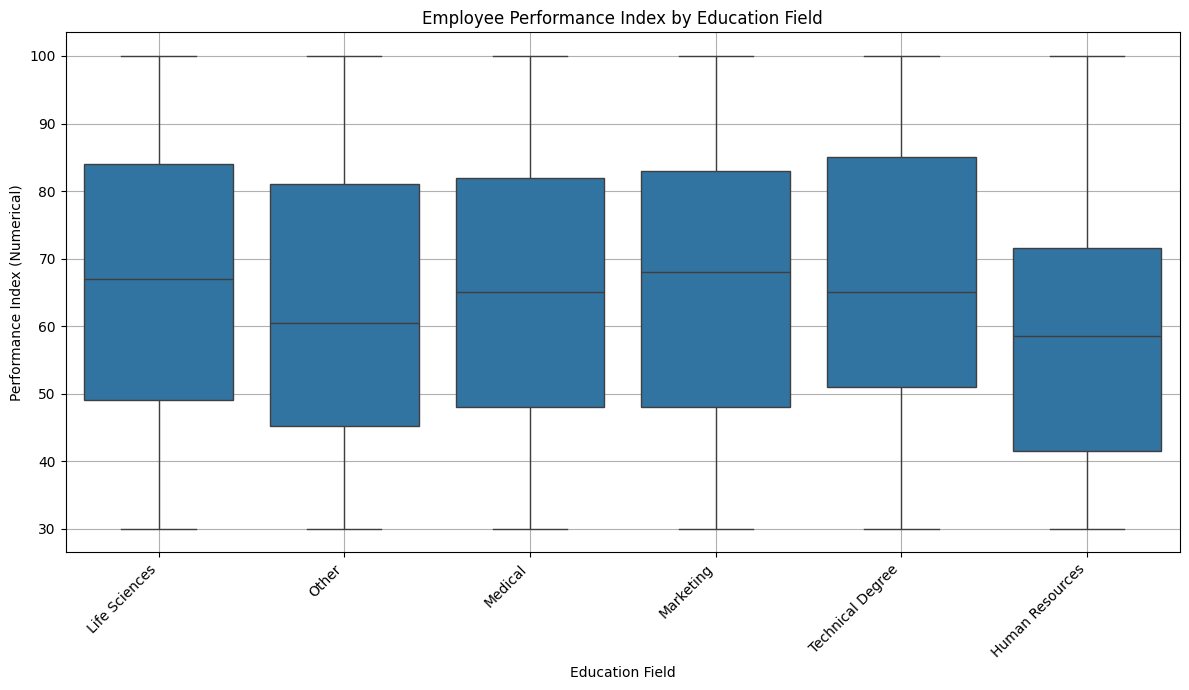

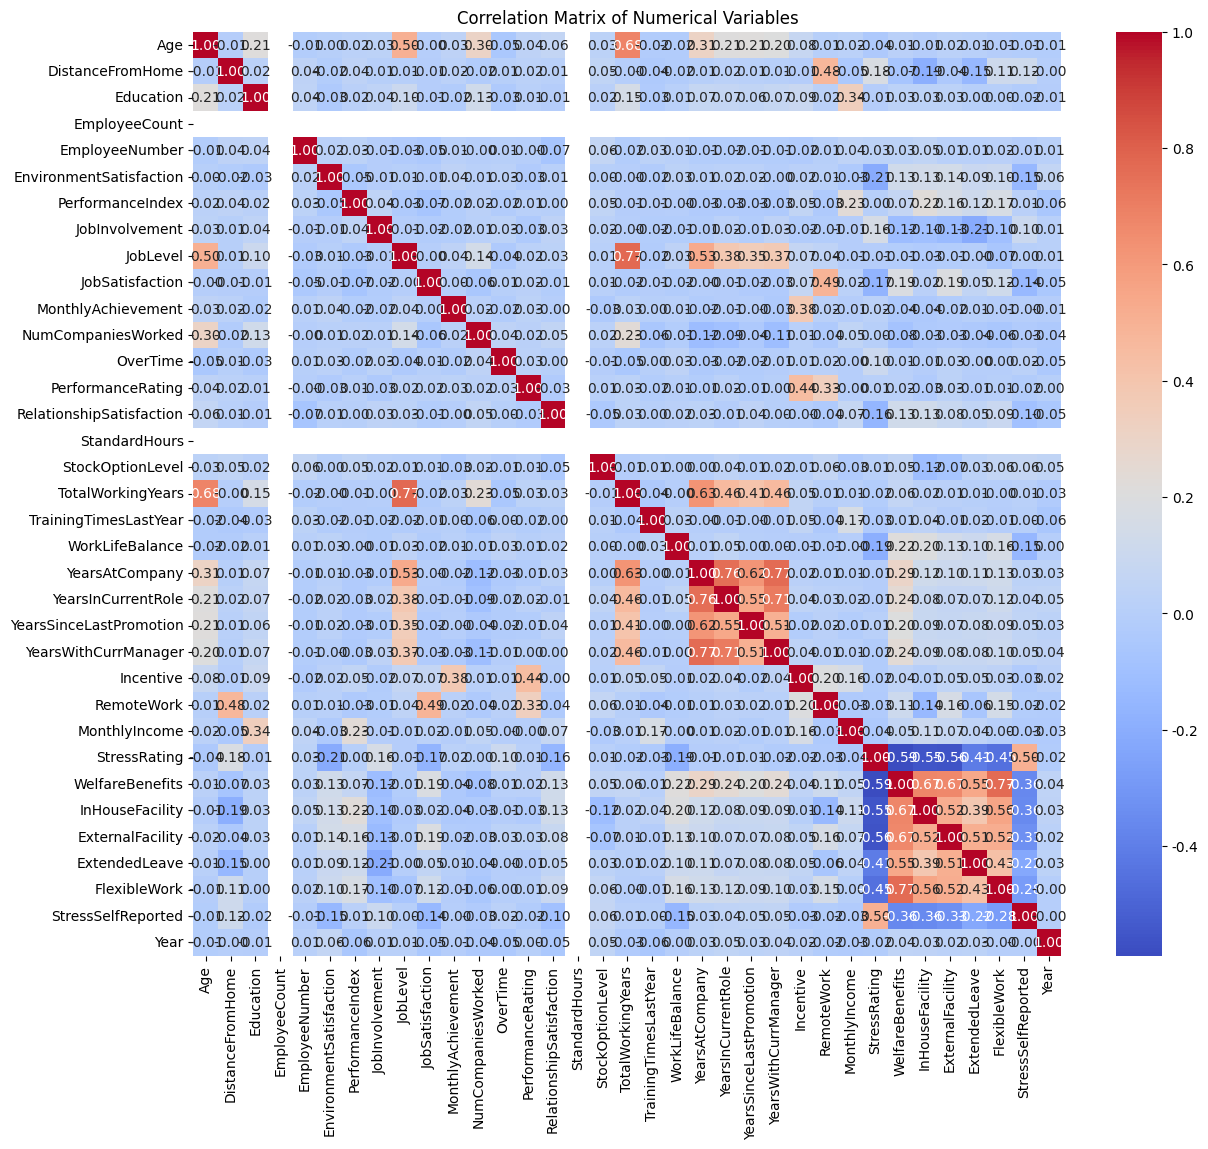

In [ ]:
# 学歴分野別のパフォーマンス指標
# 各学歴分野のパフォーマンス指標の分布をボックスプロットで比較します。
plt.figure(figsize=(12, 7))
sns.boxplot(x='EducationField', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Education Field') # 学歴分野別の従業員パフォーマンス指標
plt.xlabel('Education Field') # 学歴分野
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 数値変数の相関行列のヒートマップ
# すべての数値変数間の相関関係をヒートマップで視覚化し、変数間の線形関係の強さを確認します。
plt.figure(figsize=(14, 12))
numeric_df = df.select_dtypes(include=['number']) # 数値型のみを選択
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables') # 数値変数の相関行列
plt.show()


In [ ]:
# 分析するカテゴリカル特徴量のリスト
# List of categorical features to analyze
categorical_features = [
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'StressRating',
    'PerformanceRating',
    'JobInvolvement',
    'Department',
    'JobRole',
    'MaritalStatus',
    'BusinessTravel',
    'Gender',
    'Education',
    'RemoteWork',
    'WelfareBenefits',
    'InHouseFacility',
    'ExternalFacility',
    'ExtendedLeave',
    'FlexibleWork',
    'PerformanceCategory' # 新しく作成したパフォーマンスカテゴリも追加
]

print("--- 各カテゴリカル特徴量の要素ごとの人数 ---") # --- Counts for each element of categorical features ---

for col in categorical_features:
    print(f"\nFeature: {col}") # Feature: <column_name>
    # 各要素の人数をカウントし、Markdown形式で表示
    # Count the number of employees for each element and print in Markdown format
    counts = df[col].value_counts().sort_index() # 要素ごとにカウントし、ソート
    print(counts.to_markdown(numalign="left", stralign="left"))



--- 各カテゴリカル特徴量の要素ごとの人数 ---

Feature: JobSatisfaction
| JobSatisfaction   | count   |
|:------------------|:--------|
| 1                 | 289     |
| 2                 | 280     |
| 3                 | 442     |
| 4                 | 459     |

Feature: EnvironmentSatisfaction
| EnvironmentSatisfaction   | count   |
|:--------------------------|:--------|
| 1                         | 284     |
| 2                         | 287     |
| 3                         | 453     |
| 4                         | 446     |

Feature: WorkLifeBalance
| WorkLifeBalance   | count   |
|:------------------|:--------|
| 1                 | 80      |
| 2                 | 344     |
| 3                 | 893     |
| 4                 | 153     |

Feature: StressRating
| StressRating   | count   |
|:---------------|:--------|
| 1              | 162     |
| 2              | 611     |
| 3              | 526     |
| 4              | 143     |
| 5              | 28      |

Feature: PerformanceRating
| Perform

/tmp/ipython-input-59-3793543016.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incentive_by_performance_rating.index, y=incentive_by_performance_rating.values, palette='coolwarm')


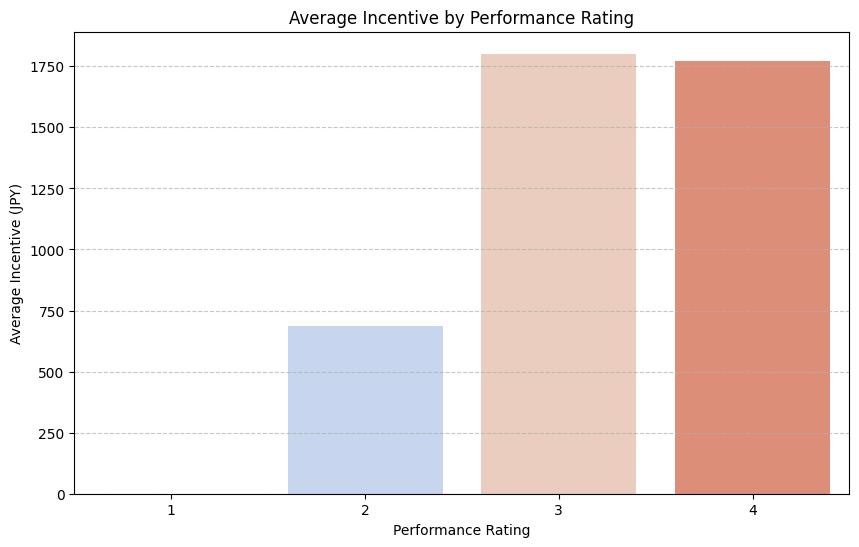

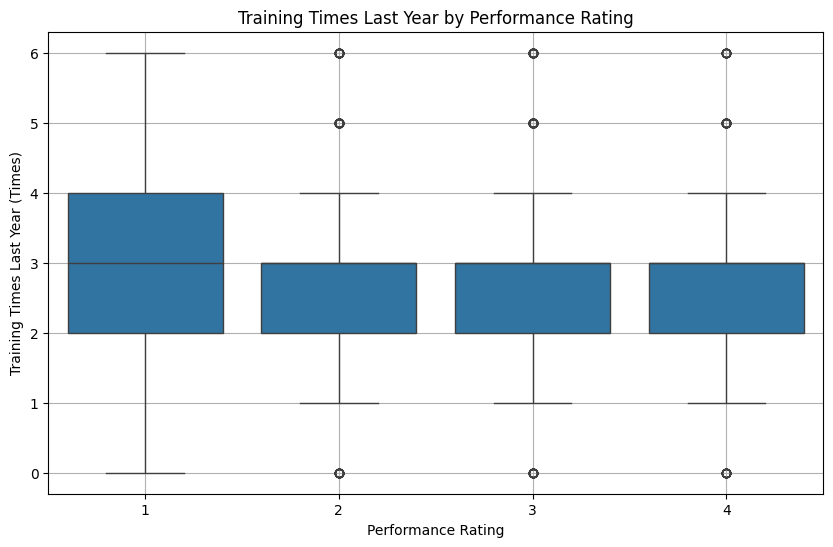

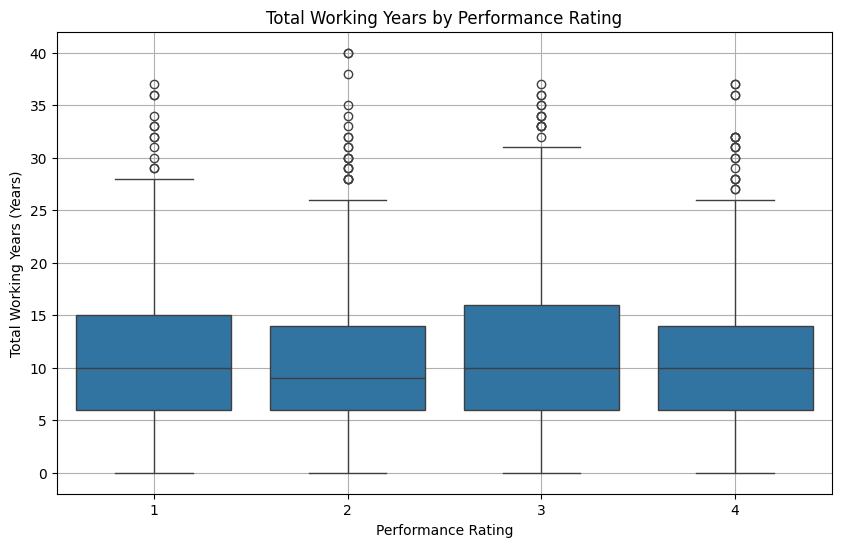

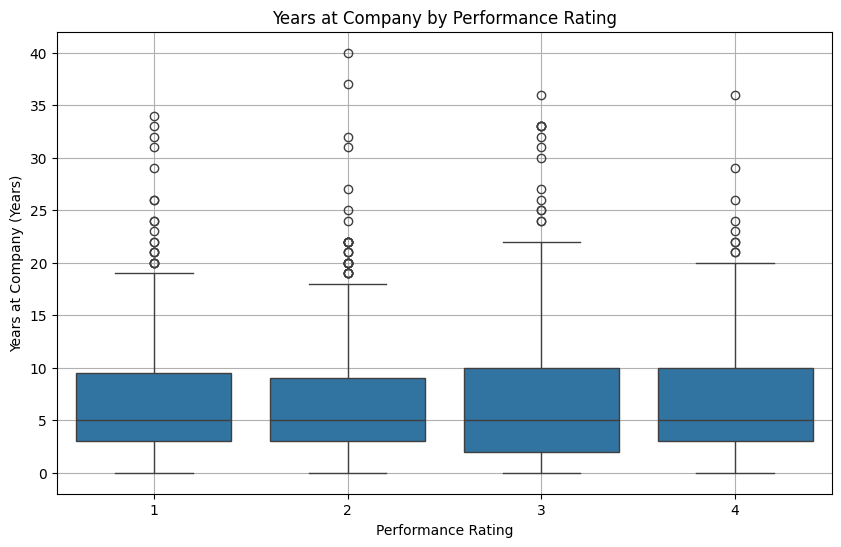

<Figure size 1200x700 with 0 Axes>

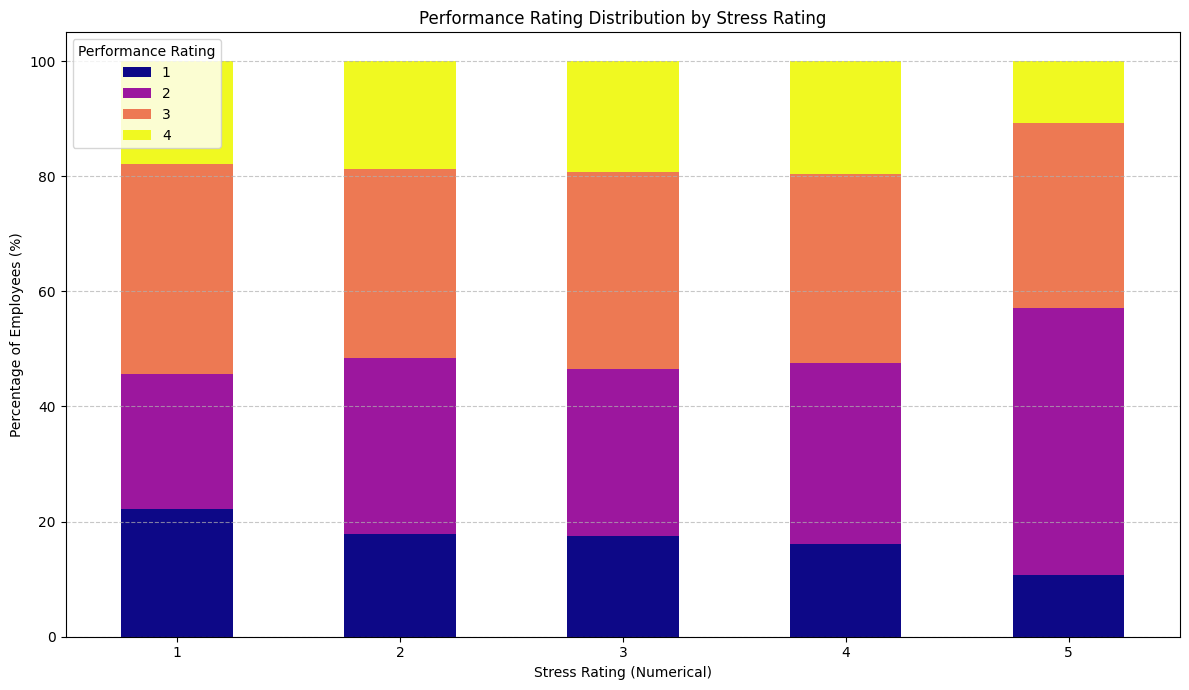

<Figure size 1000x600 with 0 Axes>

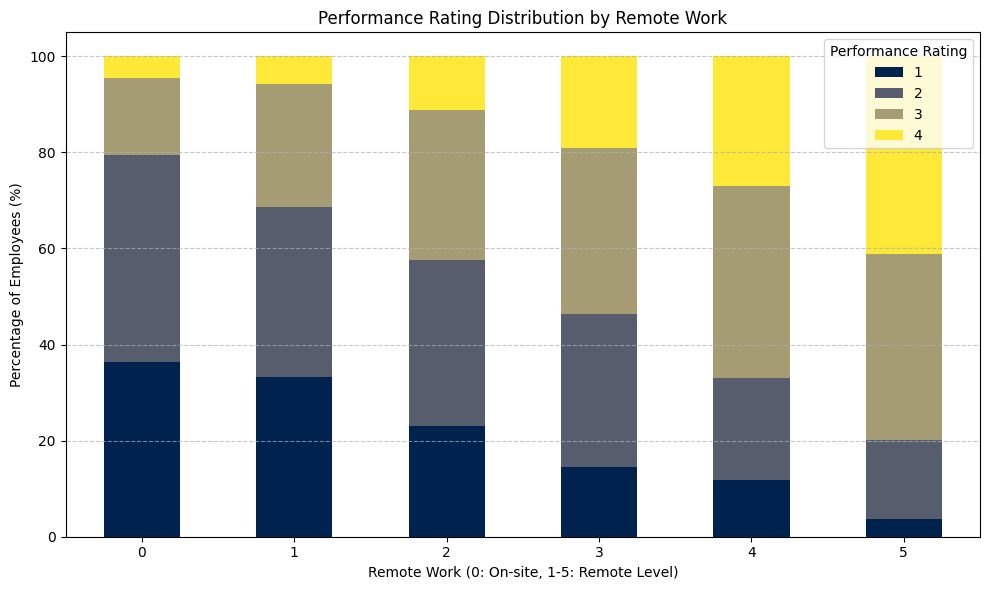

<Figure size 1400x800 with 0 Axes>

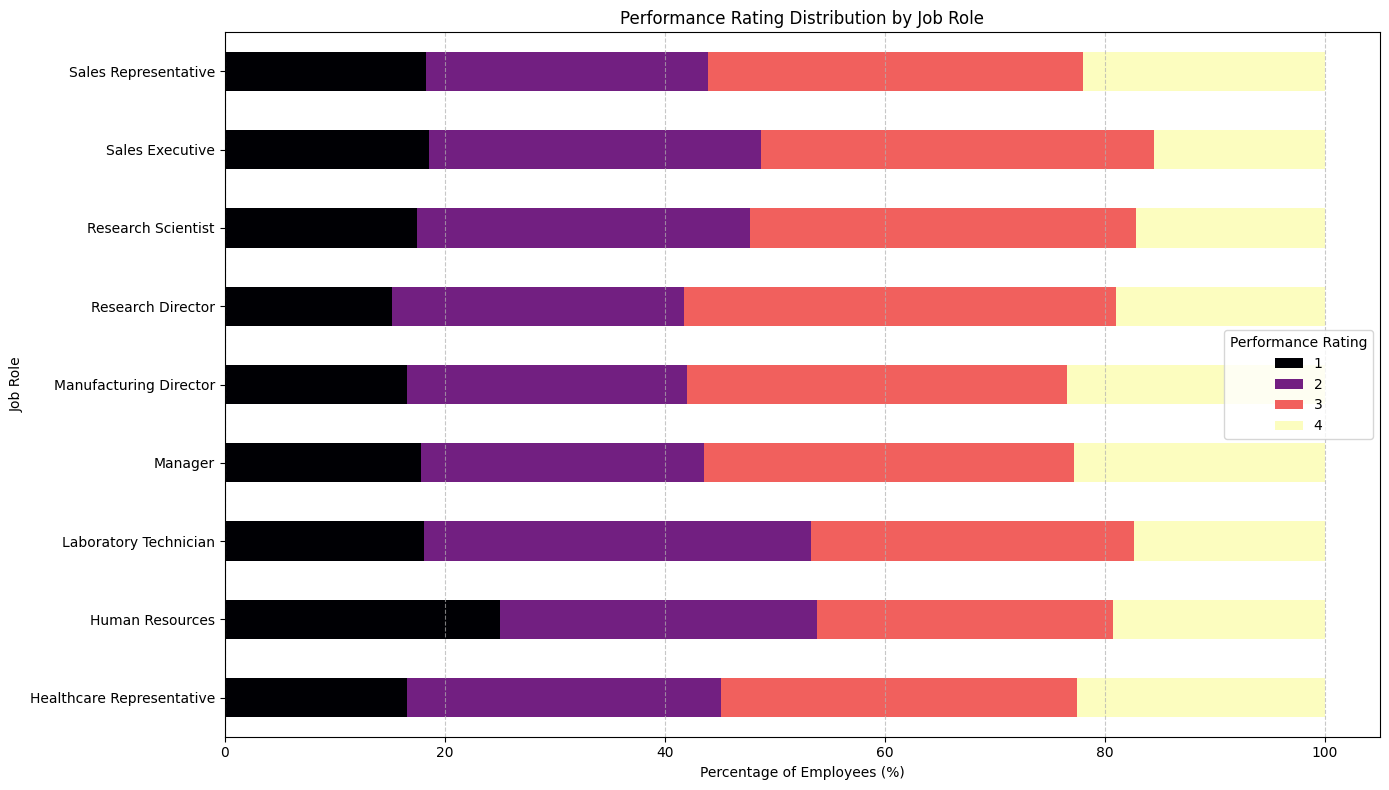

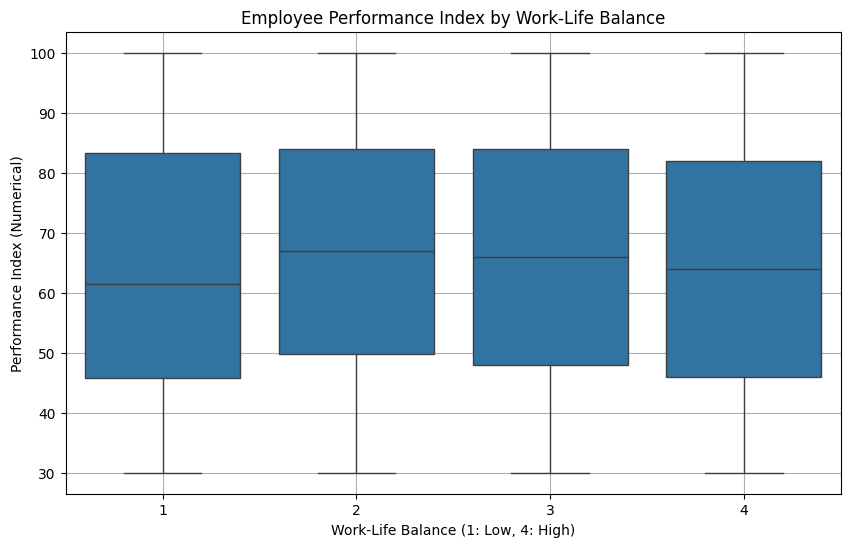

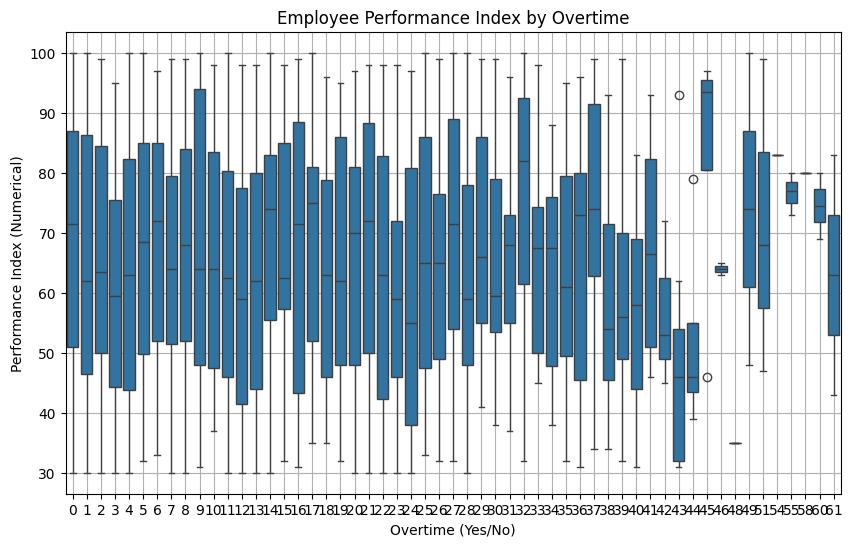

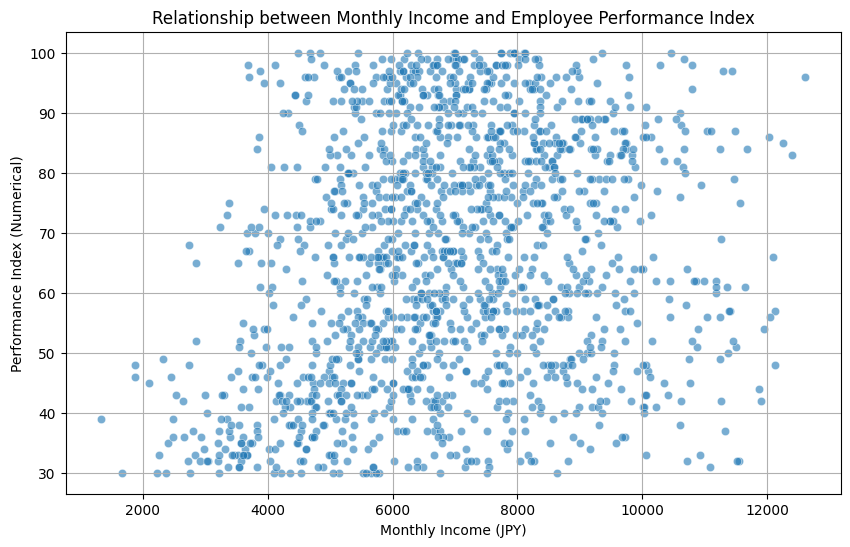

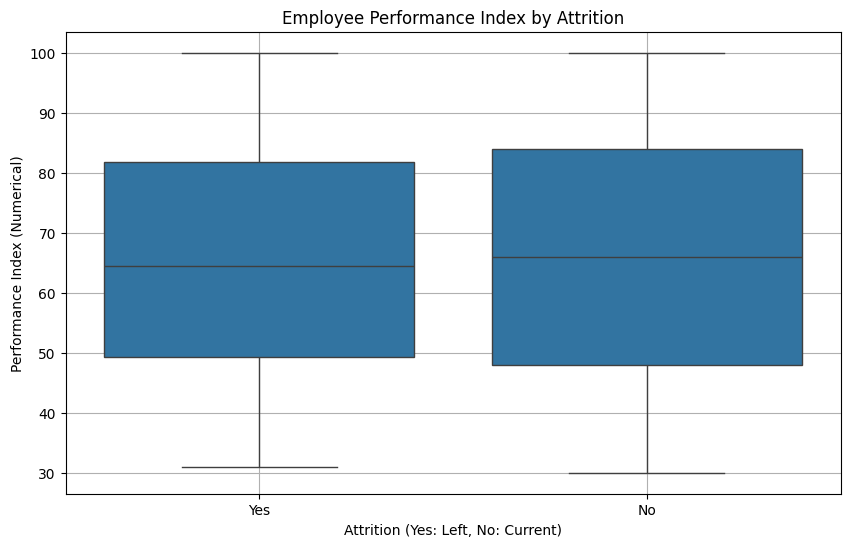

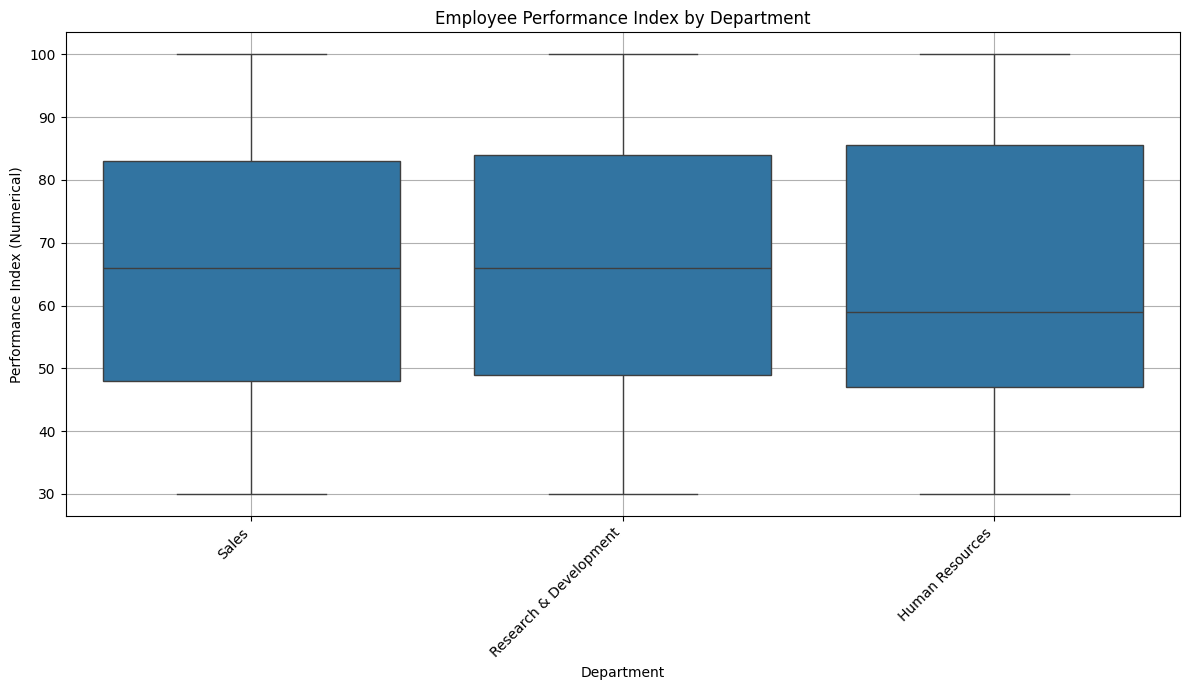

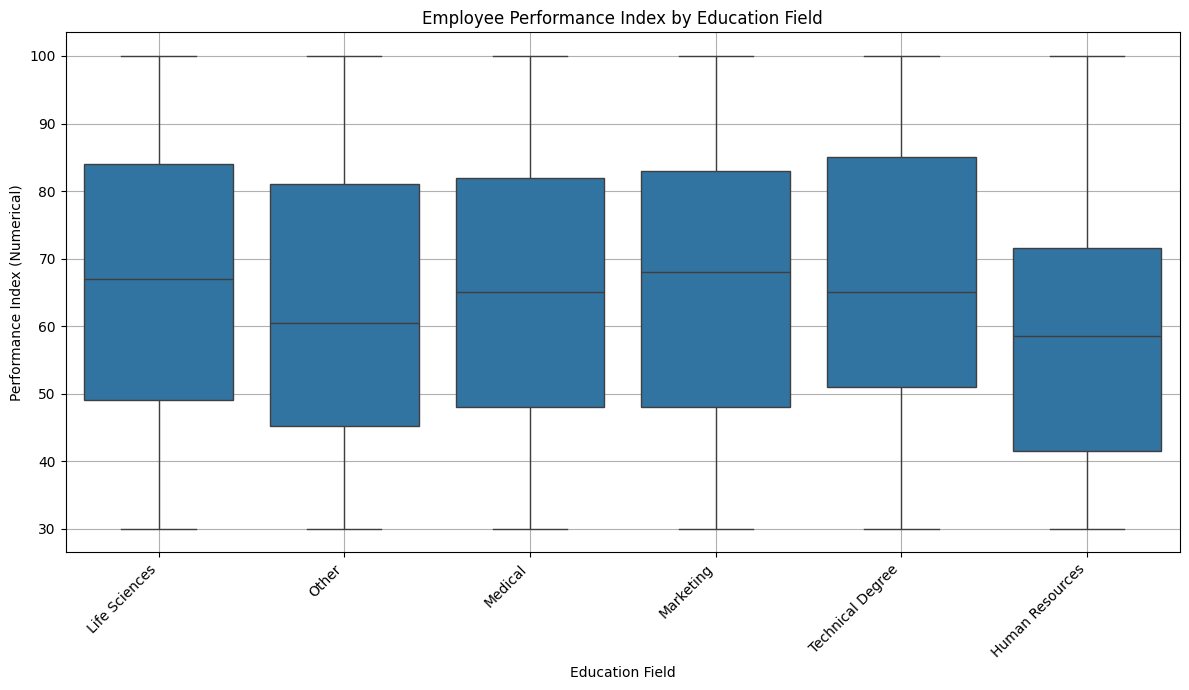

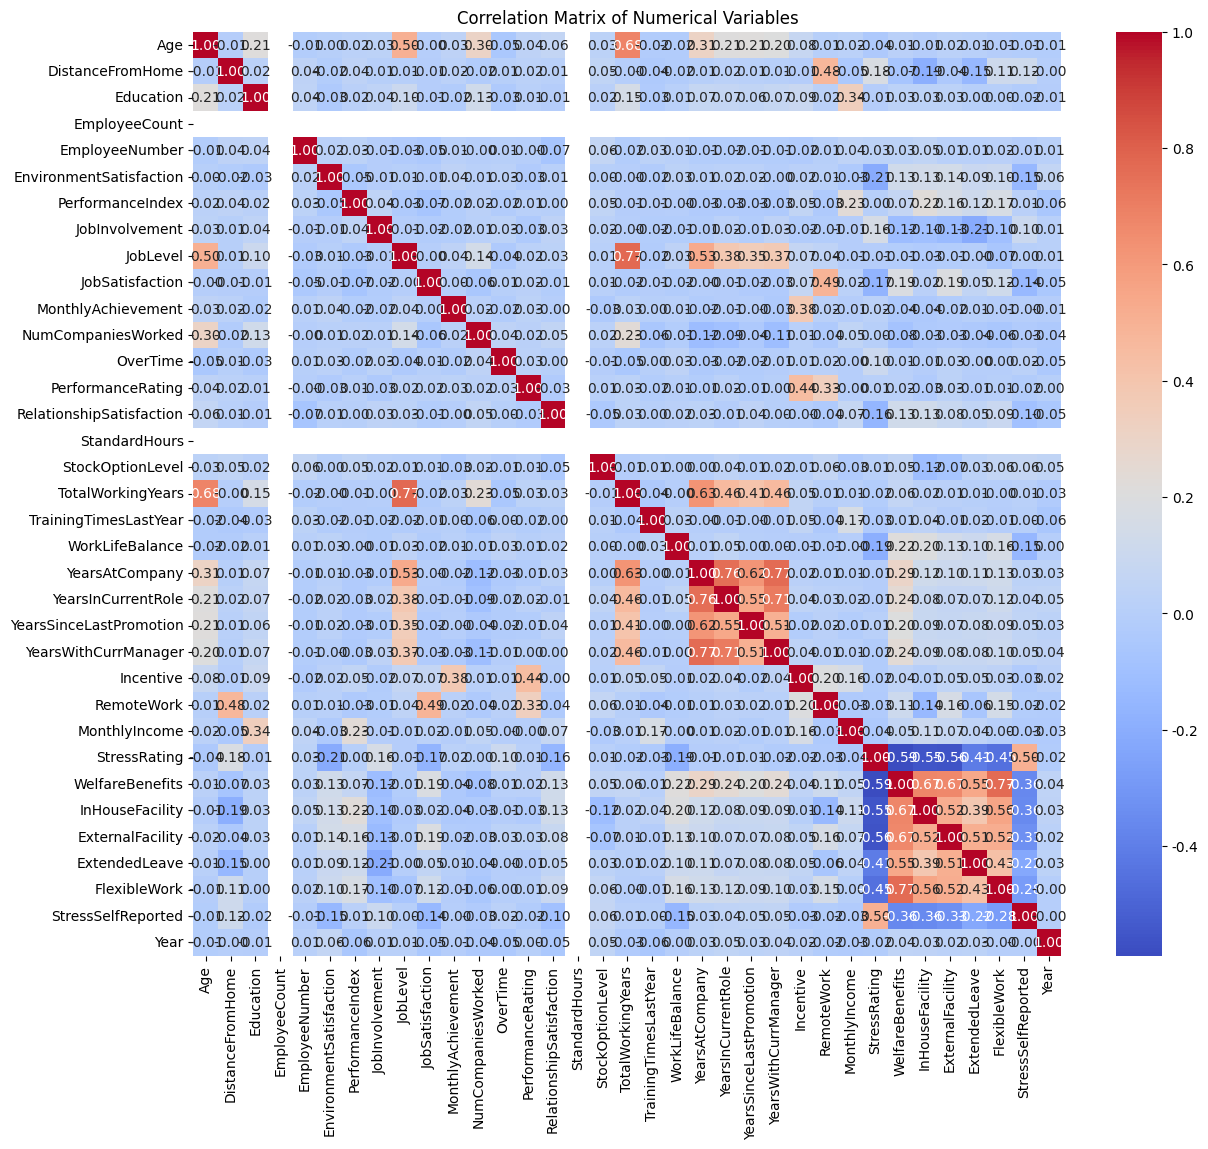

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib as mpl

# 1. 低いインセンティブ: PerformanceRating「1」の従業員の平均インセンティブ
# Average Incentive for employees with PerformanceRating '1'
plt.figure(figsize=(10, 6))
incentive_by_performance_rating = df.groupby('PerformanceRating')['Incentive'].mean()
sns.barplot(x=incentive_by_performance_rating.index, y=incentive_by_performance_rating.values, palette='coolwarm')
plt.title('Average Incentive by Performance Rating') # パフォーマンス評価別の平均インセンティブ
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Average Incentive (JPY)') # 平均インセンティブ (日本円)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. トレーニングと勤続年数: TrainingTimesLastYear, TotalWorkingYears, YearsAtCompany
# Training and Years of Service: TrainingTimesLastYear, TotalWorkingYears, YearsAtCompany
# PerformanceRating別のTrainingTimesLastYearの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='TrainingTimesLastYear', data=df)
plt.title('Training Times Last Year by Performance Rating') # パフォーマンス評価別の昨年のトレーニング回数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Training Times Last Year (Times)') # 昨年のトレーニング回数 (回)
plt.grid(True)
plt.show()

# PerformanceRating別のTotalWorkingYearsの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='TotalWorkingYears', data=df)
plt.title('Total Working Years by Performance Rating') # パフォーマンス評価別の総勤続年数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Total Working Years (Years)') # 総勤続年数 (年)
plt.grid(True)
plt.show()

# PerformanceRating別のYearsAtCompanyの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='YearsAtCompany', data=df)
plt.title('Years at Company by Performance Rating') # パフォーマンス評価別の現会社勤続年数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Years at Company (Years)') # 現会社勤続年数 (年)
plt.grid(True)
plt.show()


# 3. ストレスレベルとパフォーマンス: StressRatingが「5（Very High）」の従業員はPerformanceRating「2」が46.42%
# Stress Level and Performance: Employees with StressRating '5' (Very High) have the highest percentage of PerformanceRating '2'
plt.figure(figsize=(12, 7))
df_stacked_stress = df.groupby(['StressRating', 'PerformanceRating']).size().unstack(fill_value=0)
df_stacked_stress_percent = df_stacked_stress.div(df_stacked_stress.sum(axis=1), axis=0) * 100

df_stacked_stress_percent.plot(kind='bar', stacked=True, cmap='plasma', figsize=(12, 7))
plt.title('Performance Rating Distribution by Stress Rating') # ストレス評価別のパフォーマンスカテゴリ分布
plt.xlabel('Stress Rating (Numerical)') # ストレス評価 (数値)
plt.ylabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.xticks(rotation=0)
plt.legend(title='Performance Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. リモートワークとパフォーマンス: RemoteWorkが「0（on-site work）」の従業員はPerformanceRating「1」が36.36%
# Remote Work and Performance: Employees with RemoteWork '0' (on-site work) have the highest percentage of PerformanceRating '1'
plt.figure(figsize=(10, 6))
df_stacked_remote = df.groupby(['RemoteWork', 'PerformanceRating']).size().unstack(fill_value=0)
df_stacked_remote_percent = df_stacked_remote.div(df_stacked_remote.sum(axis=1), axis=0) * 100

df_stacked_remote_percent.plot(kind='bar', stacked=True, cmap='cividis', figsize=(10, 6))
plt.title('Performance Rating Distribution by Remote Work') # リモートワーク別のパフォーマンスカテゴリ分布
plt.xlabel('Remote Work (0: On-site, 1-5: Remote Level)') # リモートワーク (0:オンサイト, 1-5:リモートレベル)
plt.ylabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.xticks(rotation=0)
plt.legend(title='Performance Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. JobRoleとパフォーマンス: Sales RepresentativeはPerformanceRating「1」が18.29%、「4」が21.95%と分布が広い
# Job Role and Performance: Sales Representative shows a wide distribution of PerformanceRating '1' and '4'
plt.figure(figsize=(14, 8))
df_stacked_jobrole = df.groupby(['JobRole', 'PerformanceRating']).size().unstack(fill_value=0)
df_stacked_jobrole_percent = df_stacked_jobrole.div(df_stacked_jobrole.sum(axis=1), axis=0) * 100

df_stacked_jobrole_percent.plot(kind='barh', stacked=True, cmap='magma', figsize=(14, 8))
plt.title('Performance Rating Distribution by Job Role') # 職務別のパフォーマンスカテゴリ分布
plt.ylabel('Job Role') # 職務
plt.xlabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.yticks(rotation=0)
plt.legend(title='Performance Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# パフォーマンス指標と他の変数との関係を探る (残りのグラフは箱ひげ図のまま)

# ワークライフバランス別のパフォーマンス指標
plt.figure(figsize=(10, 6))
sns.boxplot(x='WorkLifeBalance', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Work-Life Balance') # ワークライフバランス別の従業員パフォーマンス指標
plt.xlabel('Work-Life Balance (1: Low, 4: High)') # ワークライフバランス (1:低い, 4:高い)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 残業の有無別のパフォーマンス指標
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverTime', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Overtime') # 残業の有無別の従業員パフォーマンス指標
plt.xlabel('Overtime (Yes/No)') # 残業の有無 (Yes:あり, No:なし)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# ストレス評価別のパフォーマンス指標 (これは上記の積み上げ棒グラフでより詳細にカバーされているため、重複を避けるためにコメントアウトも検討できますが、ここでは残します)
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='StressRating', y='PerformanceIndex', data=df)
# plt.title('Employee Performance Index by Stress Rating') # ストレス評価別の従業員パフォーマンス指標
# plt.xlabel('Stress Rating (Numerical)') # ストレス評価 (数値)
# plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
# plt.grid(True)
# plt.show()

# 月収とパフォーマンス指標の関係
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='PerformanceIndex', data=df, alpha=0.6)
plt.title('Relationship between Monthly Income and Employee Performance Index') # 月収と従業員パフォーマンス指標の関係
plt.xlabel('Monthly Income (JPY)') # 月収 (日本円)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 勤続年数とパフォーマンス指標の関係 (これも上記のボックスプロットでより詳細にカバーされているため、重複を避けるためにコメントアウトも検討できますが、ここでは残します)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='YearsAtCompany', y='PerformanceIndex', data=df, alpha=0.6)
# plt.title('Relationship between Years at Company and Employee Performance Index') # 勤続年数と従業員パフォーマンス指標の関係
# plt.xlabel('Years at Company (Years)') # 勤続年数 (年)
# plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
# plt.grid(True)
# plt.show()

# 離職の有無別のパフォーマンス指標
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Attrition') # 離職の有無別の従業員パフォーマンス指標
plt.xlabel('Attrition (Yes: Left, No: Current)') # 離職の有無 (Yes:離職, No:在籍)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 部門別のパフォーマンス指標
plt.figure(figsize=(12, 7))
sns.boxplot(x='Department', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Department') # 部門別の従業員パフォーマンス指標
plt.xlabel('Department') # 部門
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 学歴分野別のパフォーマンス指標
plt.figure(figsize=(12, 7))
sns.boxplot(x='EducationField', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Education Field') # 学歴分野別の従業員パフォーマンス指標
plt.xlabel('Education Field') # 学歴分野
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 数値変数の相関行列のヒートマップ
plt.figure(figsize=(14, 12))
numeric_df = df.select_dtypes(include=['number']) # 数値型のみを選択
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables') # 数値変数の相関行列
plt.show()

<Figure size 1400x800 with 0 Axes>

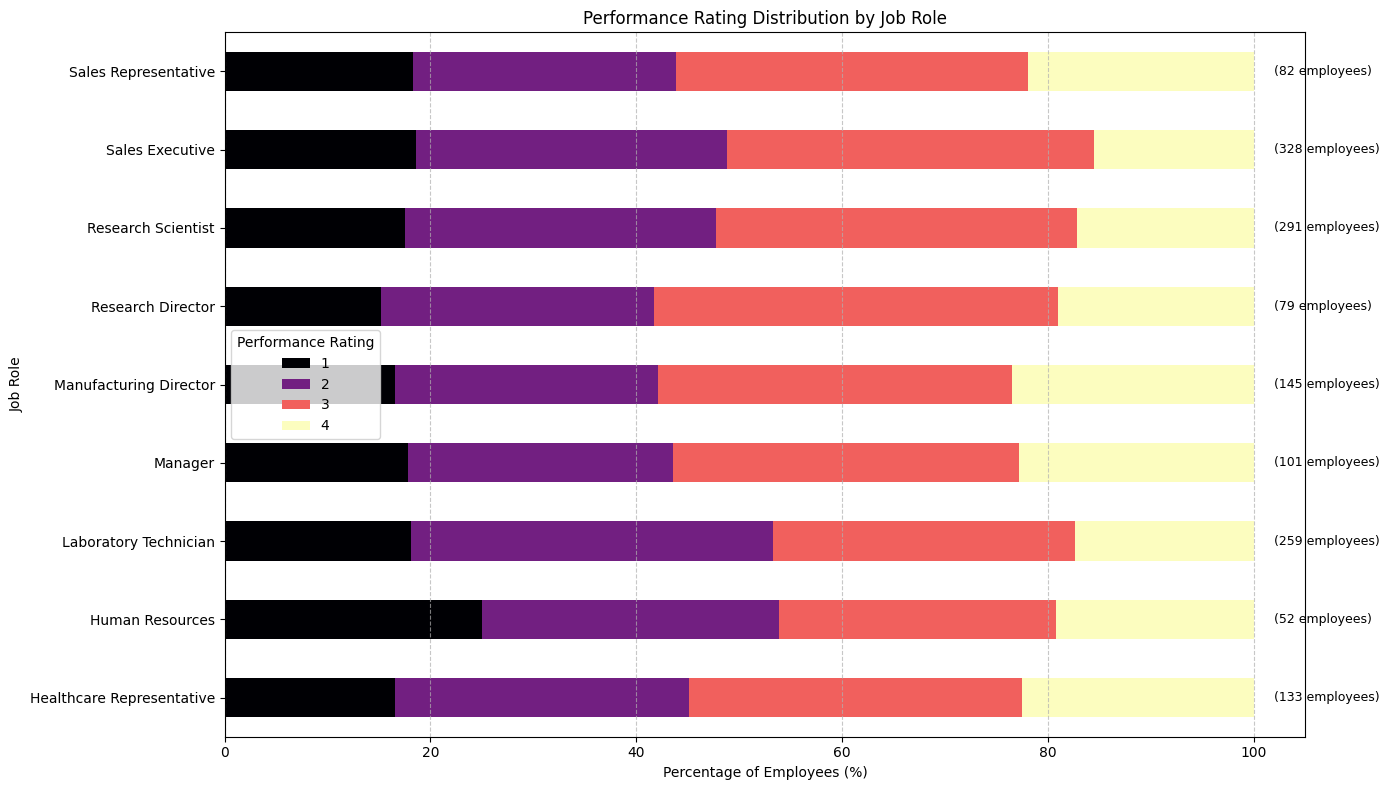

In [ ]:
# 5. JobRoleとパフォーマンス: Sales RepresentativeはPerformanceRating「1」が18.29%、「4」が21.95%と分布が広い
# Job Role and Performance: Sales Representative shows a wide distribution of PerformanceRating '1' and '4'
plt.figure(figsize=(14, 8))
df_stacked_jobrole = df.groupby(['JobRole', 'PerformanceRating']).size().unstack(fill_value=0)
df_stacked_jobrole_percent = df_stacked_jobrole.div(df_stacked_jobrole.sum(axis=1), axis=0) * 100

ax = df_stacked_jobrole_percent.plot(kind='barh', stacked=True, cmap='magma', figsize=(14, 8))
plt.title('Performance Rating Distribution by Job Role') # 職務別のパフォーマンスカテゴリ分布
plt.ylabel('Job Role') # 職務
plt.xlabel('Percentage of Employees (%)') # 従業員の割合 (%)
plt.yticks(rotation=0)
plt.legend(title='Performance Rating')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 各JobRoleの合計人数を計算し、グラフのy軸の順序に合わせる
# df_stacked_jobrole_percent のインデックスはグラフのy軸の順序と一致します。
job_role_counts = df['JobRole'].value_counts()

# グラフに合計人数を追加
# y軸のラベルと対応するy座標を取得
yticks = ax.get_yticks()
yticklabels = [label.get_text() for label in ax.get_yticklabels()]

# JobRole名とy座標のマップを作成
job_role_y_pos = {label: yticks[i] for i, label in enumerate(yticklabels)}

# df_stacked_jobrole_percent のインデックス（JobRoleの順序）でループ
for job_role in df_stacked_jobrole_percent.index:
    total_count = job_role_counts.get(job_role, 0) # 念のためget()で存在しないJobRoleに対応
    y_pos = job_role_y_pos.get(job_role) # グラフのy軸上の正確な位置を取得

    if y_pos is not None:
        ax.text(102, y_pos, f'({total_count} employees)', va='center', ha='left', color='black', fontsize=9)

plt.tight_layout()
plt.show()

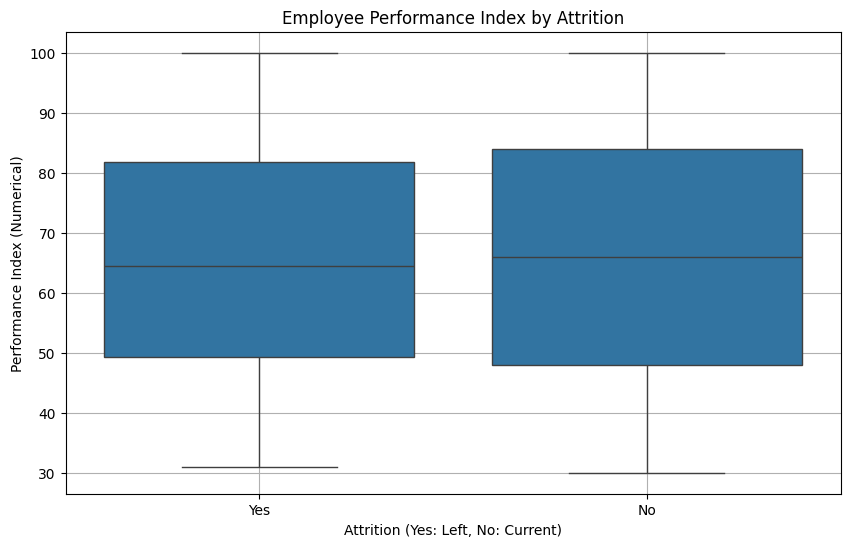

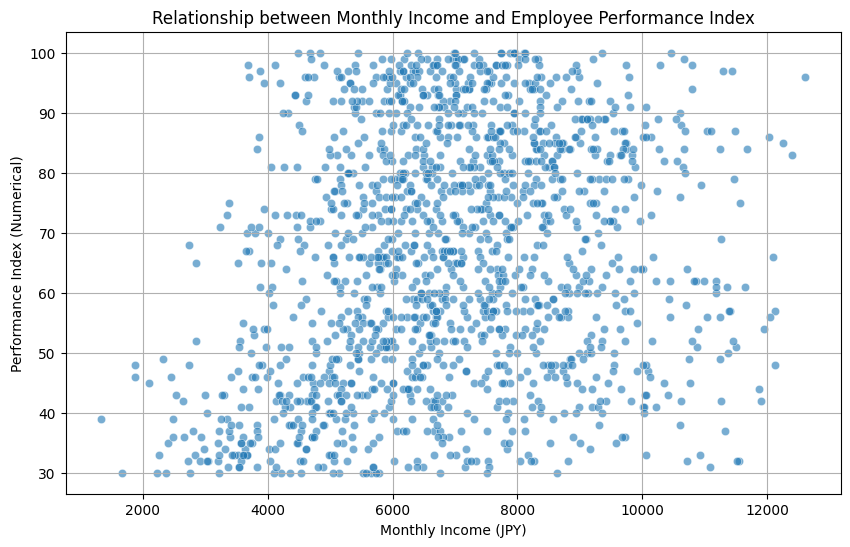

In [ ]:
# 離職の有無別のパフォーマンス指標
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='PerformanceIndex', data=df)
plt.title('Employee Performance Index by Attrition') # 離職の有無別の従業員パフォーマンス指標
plt.xlabel('Attrition (Yes: Left, No: Current)') # 離職の有無 (Yes:離職, No:在籍)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

# 月収とパフォーマンス指標の関係
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyIncome', y='PerformanceIndex', data=df, alpha=0.6)
plt.title('Relationship between Monthly Income and Employee Performance Index') # 月収と従業員パフォーマンス指標の関係
plt.xlabel('Monthly Income (JPY)') # 月収 (日本円)
plt.ylabel('Performance Index (Numerical)') # パフォーマンス指標 (数値)
plt.grid(True)
plt.show()

/tmp/ipython-input-11-2106049597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incentive_by_performance_rating.index, y=incentive_by_performance_rating.values, palette='coolwarm')


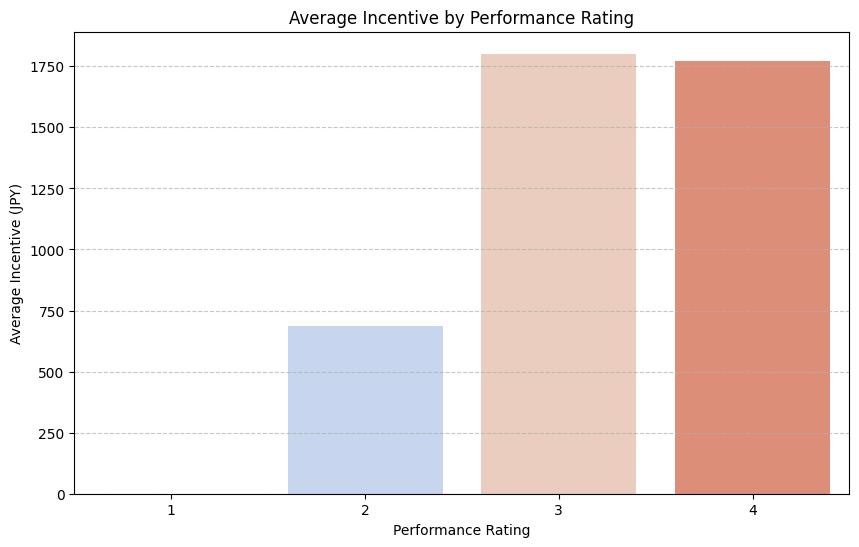

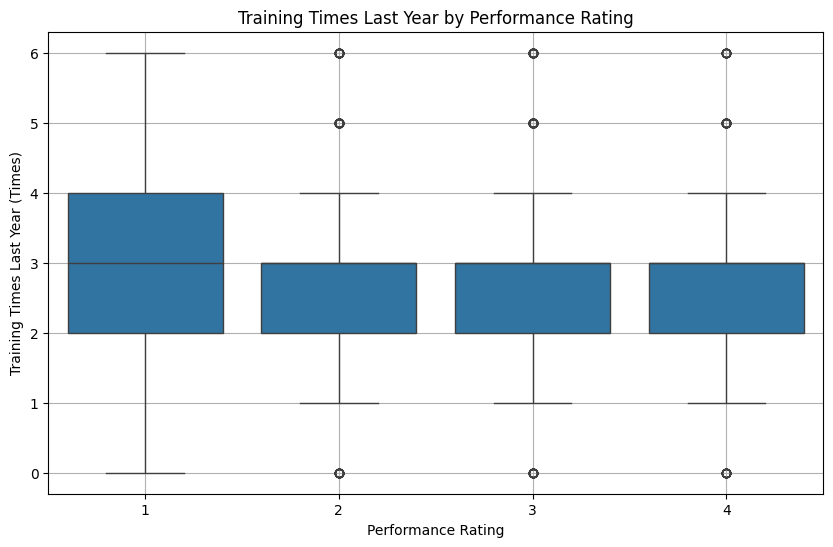

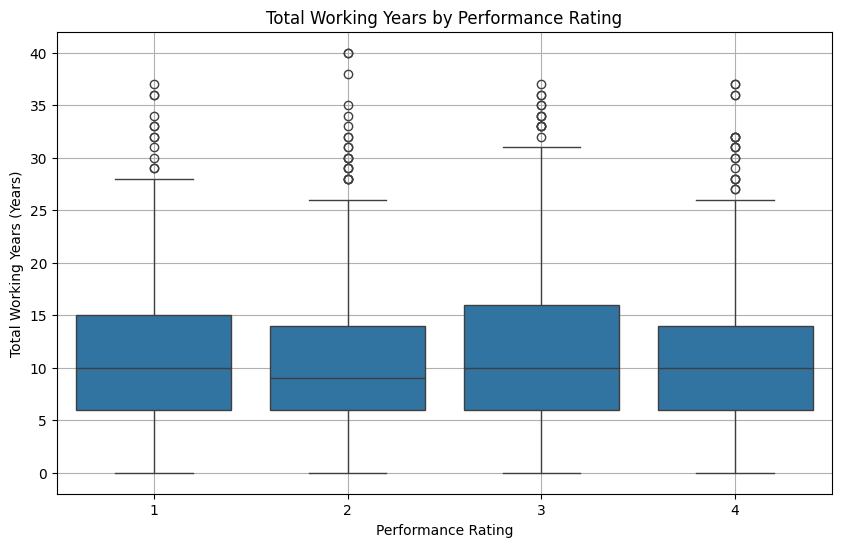

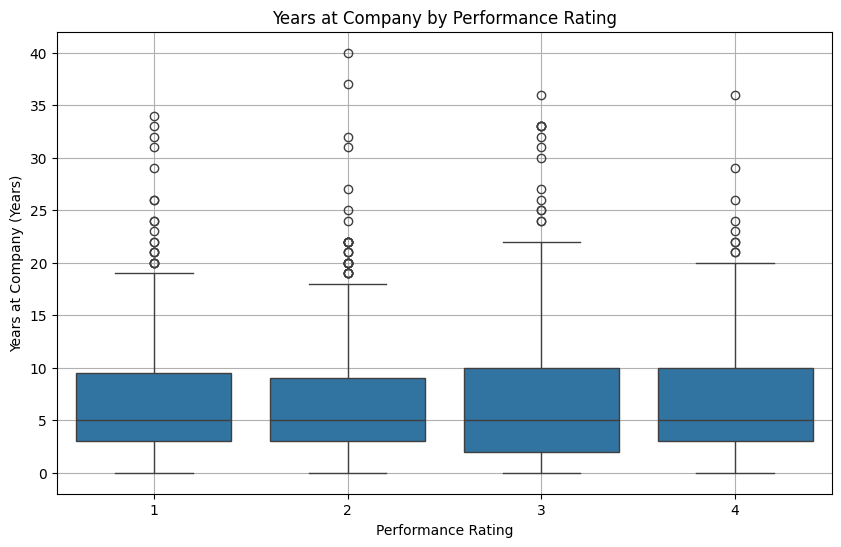

In [ ]:
# 1. 低いインセンティブ: PerformanceRating「1」の従業員の平均インセンティブ
# Average Incentive for employees with PerformanceRating '1'
plt.figure(figsize=(10, 6))
incentive_by_performance_rating = df.groupby('PerformanceRating')['Incentive'].mean()
sns.barplot(x=incentive_by_performance_rating.index, y=incentive_by_performance_rating.values, palette='coolwarm')
plt.title('Average Incentive by Performance Rating') # パフォーマンス評価別の平均インセンティブ
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Average Incentive (JPY)') # 平均インセンティブ (日本円)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. トレーニングと勤続年数: TrainingTimesLastYear, TotalWorkingYears, YearsAtCompany
# Training and Years of Service: TrainingTimesLastYear, TotalWorkingYears, YearsAtCompany
# PerformanceRating別のTrainingTimesLastYearの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='TrainingTimesLastYear', data=df)
plt.title('Training Times Last Year by Performance Rating') # パフォーマンス評価別の昨年のトレーニング回数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Training Times Last Year (Times)') # 昨年のトレーニング回数 (回)
plt.grid(True)
plt.show()

# PerformanceRating別のTotalWorkingYearsの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='TotalWorkingYears', data=df)
plt.title('Total Working Years by Performance Rating') # パフォーマンス評価別の総勤続年数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Total Working Years (Years)') # 総勤続年数 (年)
plt.grid(True)
plt.show()

# PerformanceRating別のYearsAtCompanyの分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='PerformanceRating', y='YearsAtCompany', data=df)
plt.title('Years at Company by Performance Rating') # パフォーマンス評価別の現会社勤続年数
plt.xlabel('Performance Rating') # パフォーマンス評価
plt.ylabel('Years at Company (Years)') # 現会社勤続年数 (年)
plt.grid(True)
plt.show()

In [ ]:
PATH = '/content/drive/My Drive/GCI/'

df = pd.read_csv(PATH + 'data_I.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score # cross_val_score を追加
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


数値特徴量: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']
カテゴリ特徴量: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']

訓練セットのサイズ: 1176行
テストセットのサイズ: 294行

モデルを訓練中...
モデルの訓練が完了しました。

モデル評価結果 (テストセット):
平均絶対誤差 (MAE): 14.51
平均二乗誤差 (MSE): 297.78
二乗平均平方根誤差 (RMSE): 17.26
決定係数 (R-squared): 0.21

クロスバリデーションによるモデル評価 (R-squared):
各分割でのR-squaredスコア: [0.13753847 0.27733631 0.24640245 0.19069768 0.21468763]
R-squaredの平均: 0.21
R-squaredの標

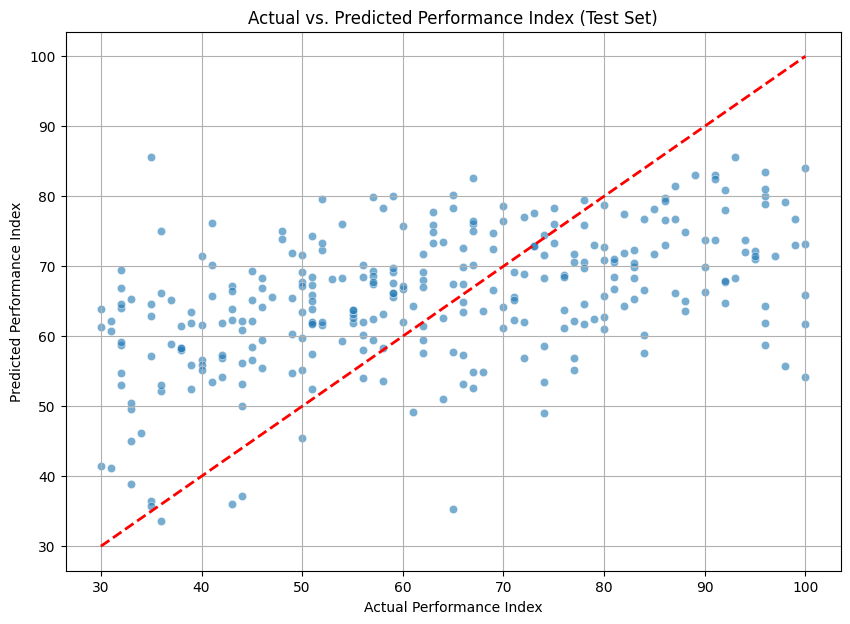

/tmp/ipython-input-6-3389775828.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


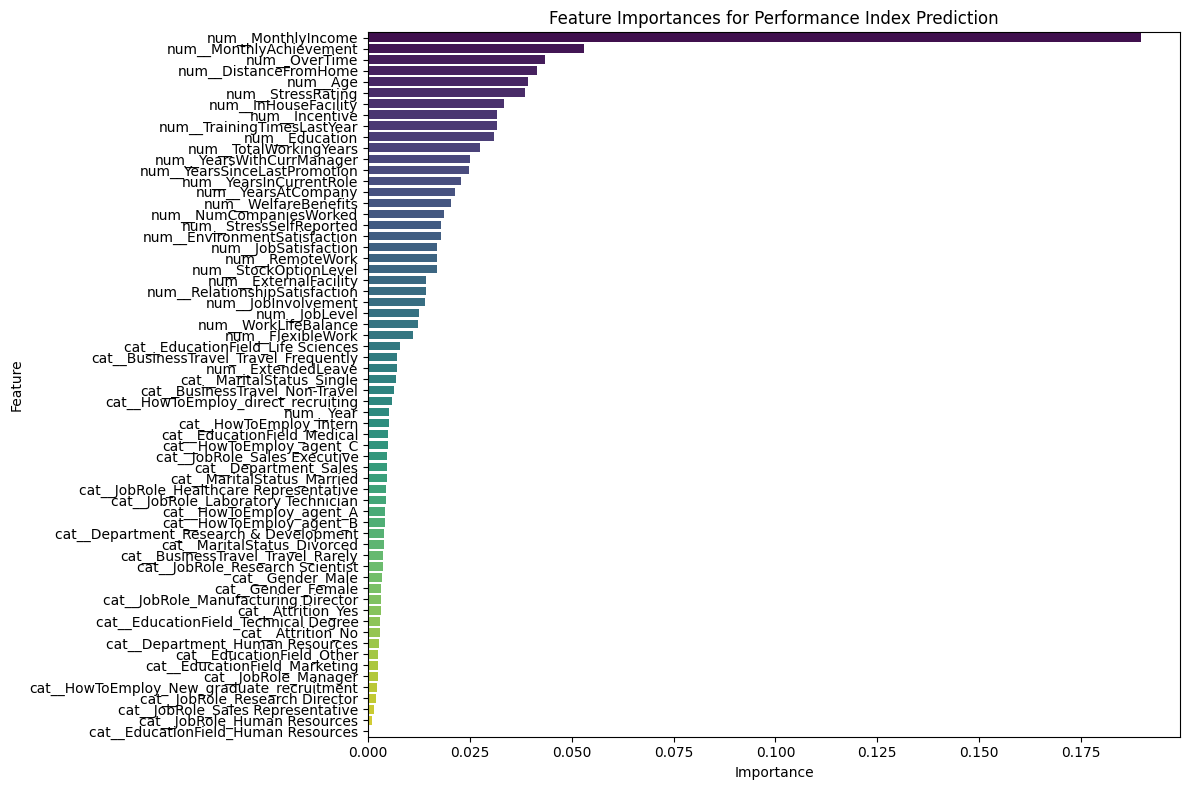

In [ ]:
# 特徴量とターゲット変数の定義
# Define features (X) and target variable (y)
# 'PerformanceIndex'が予測したいターゲット変数です。
# 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18' は、
# すべての従業員で同じ値であるか、一意の識別子であるため、特徴量から除外します。
# 'PerformanceRating' は 'PerformanceIndex' と非常に高い相関があるため、
# モデルが過学習するのを避けるために特徴量から除外します。

X = df.drop(['PerformanceIndex', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18', 'PerformanceRating'], axis=1)
y = df['PerformanceIndex']

# 数値特徴量とカテゴリ特徴量の特定
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\n数値特徴量: {numerical_features}") # Numerical features:
print(f"カテゴリ特徴量: {categorical_features}") # Categorical features:

# 前処理パイプラインの作成
# Create preprocessing pipelines
# 数値特徴量にはStandardScalerを適用
# Apply StandardScaler to numerical features
numerical_transformer = StandardScaler()

# カテゴリ特徴量にはOneHotEncoderを適用（未知のカテゴリを無視）
# Apply OneHotEncoder to categorical features (ignore unknown categories)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# ColumnTransformerを使用して、異なる種類の変換を異なる列に適用
# Use ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# モデルの構築（パイプラインに前処理とモデルを結合）
# Build the model (combine preprocessor and model in a pipeline)
# RandomForestRegressorを使用します。
# Using RandomForestRegressor.
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# データを訓練セットとテストセットに分割
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n訓練セットのサイズ: {X_train.shape[0]}行") # Training set size: <num_rows> rows
print(f"テストセットのサイズ: {X_test.shape[0]}行") # Test set size: <num_rows> rows

# モデルの訓練
# Train the model
print("\nモデルを訓練中...") # Training model...
model.fit(X_train, y_train)
print("モデルの訓練が完了しました。") # Model training complete.

# テストセットでの予測
# Make predictions on the test set
y_pred = model.predict(X_test)

# モデルの評価
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nモデル評価結果 (テストセット):") # Model Evaluation Results (Test Set):
print(f"平均絶対誤差 (MAE): {mae:.2f}") # Mean Absolute Error (MAE):
print(f"平均二乗誤差 (MSE): {mse:.2f}") # Mean Squared Error (MSE):
print(f"二乗平均平方根誤差 (RMSE): {rmse:.2f}") # Root Mean Squared Error (RMSE):
print(f"決定係数 (R-squared): {r2:.2f}") # R-squared:

# クロスバリデーションによるモデル評価
# Model evaluation using Cross-Validation
print("\nクロスバリデーションによるモデル評価 (R-squared):") # Model Evaluation using Cross-Validation (R-squared):
# cv=5 は5分割交差検定を意味します。
# cv=5 means 5-fold cross-validation.
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"各分割でのR-squaredスコア: {cv_scores}") # R-squared scores for each fold:
print(f"R-squaredの平均: {cv_scores.mean():.2f}") # Mean R-squared:
print(f"R-squaredの標準偏差: {cv_scores.std():.2f}") # Standard Deviation of R-squared:

# 予測結果の可視化 (実測値 vs 予測値)
# Visualize predictions (Actual vs. Predicted)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # 理想的な予測を示す対角線
plt.title('Actual vs. Predicted Performance Index (Test Set)') # 実測値 vs 予測値 (パフォーマンス指標) (テストセット)
plt.xlabel('Actual Performance Index') # 実測パフォーマンス指標
plt.ylabel('Predicted Performance Index') # 予測パフォーマンス指標
plt.grid(True)
plt.show()

# 特徴量の重要度 (RandomForestRegressorの場合)
# Feature Importance (for RandomForestRegressor)
# 前処理後の特徴量名を取得
# Get feature names after preprocessing
try:
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    importances = model.named_steps['regressor'].feature_importances_
    feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
    plt.title('Feature Importances for Performance Index Prediction') # パフォーマンス指標予測における特徴量の重要度
    plt.xlabel('Importance') # 重要度
    plt.ylabel('Feature') # 特徴量
    plt.tight_layout()
    plt.show()
except AttributeError:
    print("\n特徴量の重要度は、OneHotEncoderのget_feature_names_out()が利用できないため表示できません。")
    print("これは、古いscikit-learnのバージョンを使用している場合に発生する可能性があります。")
    print("Feature importances cannot be displayed because OneHotEncoder's get_feature_names_out() is not available.")
    print("This might happen if you are using an older scikit-learn version.")


初期の数値特徴量: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']
初期のカテゴリ特徴量: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']

特徴量選択のために初期モデルを訓練中...
初期モデルの訓練が完了しました。

初期モデルの特徴量の重要度:
num__MonthlyIncome                     0.189579
num__MonthlyAchievement                0.051265
num__OverTime                          0.045929
num__StressRating                      0.045141
num__Age                               0.041951
      

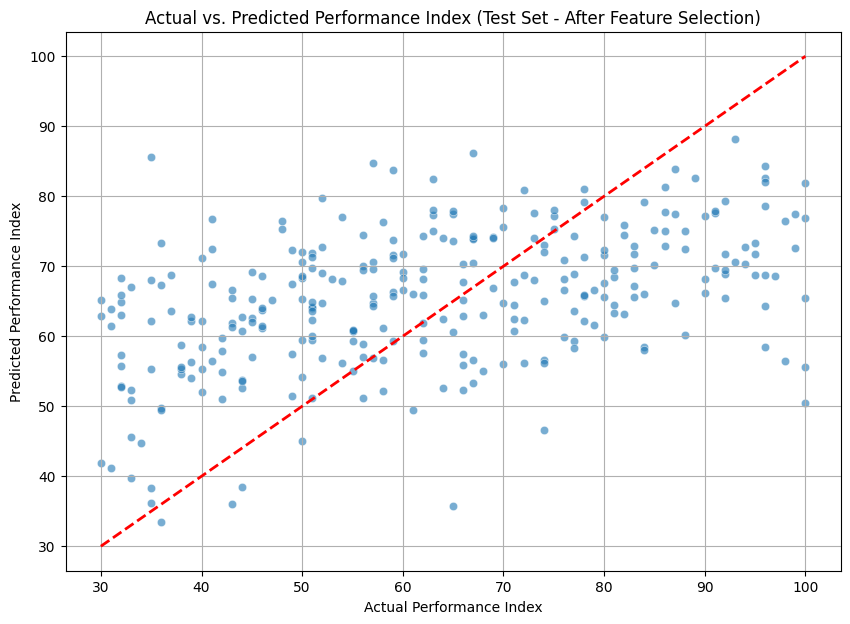

/tmp/ipython-input-14-2456551857.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')


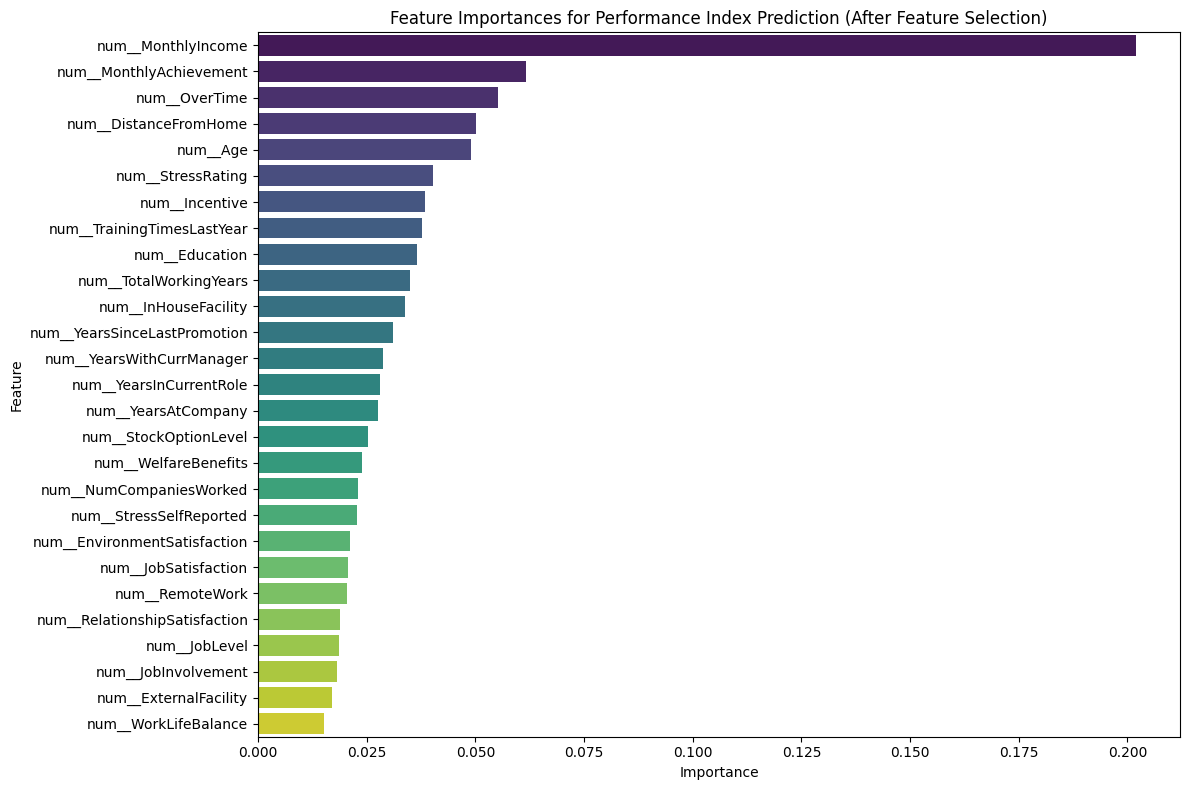

In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 特徴量とターゲット変数の定義
# Define features (X) and target variable (y)
# 'PerformanceIndex'が予測したいターゲット変数です。
# 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18' は、
# すべての従業員で同じ値であるか、一意の識別子であるため、特徴量から除外します。
# 'PerformanceRating' は 'PerformanceIndex' と非常に高い相関があるため、
# モデルが過学習するのを避けるために特徴量から除外します。
X = df.drop(['PerformanceIndex', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18', 'PerformanceRating'], axis=1)
y = df['PerformanceIndex']

# 数値特徴量とカテゴリ特徴量の特定 (初期の全特徴量)
# Identify numerical and categorical features (initial full set)
initial_numerical_features = X.select_dtypes(include=np.number).columns.tolist()
initial_categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\n初期の数値特徴量: {initial_numerical_features}") # Initial numerical features:
print(f"初期のカテゴリ特徴量: {initial_categorical_features}") # Initial categorical features:

# === 特徴量選択のための最初のモデル訓練と重要度取得 ===
# First model training and importance extraction for feature selection

# 前処理パイプラインの作成 (全特徴量用)
# Create preprocessing pipelines (for all features)
preprocessor_initial = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), initial_numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), initial_categorical_features)
    ])

# ランダムフォレストモデルの構築 (全特徴量用)
# Build RandomForest model (for all features)
model_initial = Pipeline(steps=[('preprocessor', preprocessor_initial),
                                ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# モデルの訓練 (全特徴量)
# Train the model (all features)
print("\n特徴量選択のために初期モデルを訓練中...") # Training initial model for feature selection...
model_initial.fit(X, y)
print("初期モデルの訓練が完了しました。") # Initial model training complete.

# 特徴量の重要度を取得
# Get feature importances
try:
    feature_names_initial = model_initial.named_steps['preprocessor'].get_feature_names_out()
    importances_initial = model_initial.named_steps['regressor'].feature_importances_
    feature_importances_initial = pd.Series(importances_initial, index=feature_names_initial).sort_values(ascending=False)

    print("\n初期モデルの特徴量の重要度:") # Feature importances of initial model:
    print(feature_importances_initial)

    # 重要度が0.01以上の特徴量を選択
    # Select features with importance greater than or equal to 0.01
    selected_features_preprocessed = feature_importances_initial[feature_importances_initial >= 0.01].index.tolist()
    print(f"\n重要度が0.01以上の特徴量（前処理後）: {len(selected_features_preprocessed)}個") # Features with importance >= 0.01 (after preprocessing): <num> features

    # 元のXの列名に戻すためのマッピングを作成
    # Create a mapping to revert to original X column names
    # OneHotEncoderによって生成された特徴量名から元のカテゴリカル特徴量名を特定
    # Identify original categorical feature names from OneHotEncoder generated feature names
    original_categorical_cols = []
    for col in initial_categorical_features:
        if any(f.startswith(f'cat__{col}_') for f in selected_features_preprocessed):
            original_categorical_cols.append(col)

    # 数値特徴量は直接選択
    # Numerical features are selected directly
    selected_numerical_cols = [f.replace('num__', '') for f in selected_features_preprocessed if f.startswith('num__')]

    # 最終的に選択された元の特徴量
    # Final selected original features
    final_selected_features = list(set(selected_numerical_cols + original_categorical_cols))

    print(f"\n最終的に選択された元の特徴量: {final_selected_features}") # Final selected original features:

    # 選択された特徴量でXを更新
    # Update X with selected features
    X_selected = X[final_selected_features]

except AttributeError:
    print("\n特徴量の重要度は、OneHotEncoderのget_feature_names_out()が利用できないため表示できません。")
    print("これは、古いscikit-learnのバージョンを使用している場合に発生する可能性があります。")
    print("Feature importances cannot be displayed because OneHotEncoder's get_feature_names_out() is not available.")
    print("This might happen if you are using an older scikit-learn version.")
    # エラーが発生した場合、すべての特徴量を使用し続ける
    # If an error occurs, continue using all features
    X_selected = X
    final_selected_features = X.columns.tolist()


# === 選択された特徴量でモデルを再訓練 ===
# Re-train the model with selected features

# 数値特徴量とカテゴリ特徴量の再特定 (選択された特徴量のみ)
# Re-identify numerical and categorical features (only selected features)
numerical_features_selected = X_selected.select_dtypes(include=np.number).columns.tolist()
categorical_features_selected = X_selected.select_dtypes(include='object').columns.tolist()

print(f"\n選択後の数値特徴量: {numerical_features_selected}") # Numerical features after selection:
print(f"選択後のカテゴリ特徴量: {categorical_features_selected}") # Categorical features after selection:

# 前処理パイプラインの再作成 (選択された特徴量用)
# Re-create preprocessing pipelines (for selected features)
preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_selected)
    ])

# モデルの構築（パイプラインに前処理とモデルを結合）
# Build the model (combine preprocessor and model in a pipeline)
model_final = Pipeline(steps=[('preprocessor', preprocessor_final),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# データを訓練セットとテストセットに分割 (選択されたXを使用)
# Split data into training and testing sets (using selected X)
X_train_final, X_test_final, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"\n訓練セットのサイズ (選択後): {X_train_final.shape[0]}行") # Training set size (after selection): <num_rows> rows
print(f"テストセットのサイズ (選択後): {X_test_final.shape[0]}行") # Test set size (after selection): <num_rows> rows

# モデルの訓練 (選択された特徴量)
# Train the model (selected features)
print("\n選択された特徴量でモデルを訓練中...") # Training model with selected features...
model_final.fit(X_train_final, y_train)
print("モデルの訓練が完了しました。") # Model training complete.

# テストセットでの予測
# Make predictions on the test set
y_pred_final = model_final.predict(X_test_final)

# モデルの評価
# Evaluate the model
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("\nモデル評価結果 (テストセット - 特徴量選択後):") # Model Evaluation Results (Test Set - After Feature Selection):
print(f"平均絶対誤差 (MAE): {mae_final:.2f}") # Mean Absolute Error (MAE):
print(f"平均二乗誤差 (MSE): {mse_final:.2f}") # Mean Squared Error (MSE):
print(f"二乗平均平方根誤差 (RMSE): {rmse_final:.2f}") # Root Mean Squared Error (RMSE):
print(f"決定係数 (R-squared): {r2_final:.2f}") # R-squared:

# クロスバリデーションによるモデル評価 (選択された特徴量)
# Model evaluation using Cross-Validation (selected features)
print("\nクロスバリデーションによるモデル評価 (R-squared - 特徴量選択後):") # Model Evaluation using Cross-Validation (R-squared - After Feature Selection):
cv_scores_final = cross_val_score(model_final, X_selected, y, cv=5, scoring='r2')
print(f"各分割でのR-squaredスコア: {cv_scores_final}") # R-squared scores for each fold:
print(f"R-squaredの平均: {cv_scores_final.mean():.2f}") # Mean R-squared:
print(f"R-squaredの標準偏差: {cv_scores_final.std():.2f}") # Standard Deviation of R-squared:

# 予測結果の可視化 (実測値 vs 予測値 - 特徴量選択後)
# Visualize predictions (Actual vs. Predicted - After Feature Selection)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # 理想的な予測を示す対角線
plt.title('Actual vs. Predicted Performance Index (Test Set - After Feature Selection)') # 実測値 vs 予測値 (パフォーマンス指標) (テストセット - 特徴量選択後)
plt.xlabel('Actual Performance Index') # 実測パフォーマンス指標
plt.ylabel('Predicted Performance Index') # 予測パフォーマンス指標
plt.grid(True)
plt.show()

# 特徴量の重要度 (RandomForestRegressor - 選択された特徴量)
# Feature Importance (RandomForestRegressor - Selected Features)
try:
    feature_names_final = model_final.named_steps['preprocessor'].get_feature_names_out()
    importances_final = model_final.named_steps['regressor'].feature_importances_
    feature_importances_final = pd.Series(importances_final, index=feature_names_final).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')
    plt.title('Feature Importances for Performance Index Prediction (After Feature Selection)') # パフォーマンス指標予測における特徴量の重要度 (特徴量選択後)
    plt.xlabel('Importance') # 重要度
    plt.ylabel('Feature') # 特徴量
    plt.tight_layout()
    plt.show()
except AttributeError:
    print("\n特徴量の重要度は、OneHotEncoderのget_feature_names_out()が利用できないため表示できません。")
    print("これは、古いscikit-learnのバージョンを使用している場合に発生する可能性があります。")
    print("Feature importances cannot be displayed because OneHotEncoder's get_feature_names_out() is not available.")
    print("This might happen if you are using an older scikit-learn version.")


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00



初期の数値特徴量: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']
初期のカテゴリ特徴量: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'HowToEmploy']

特徴量選択のために初期モデルを訓練中 (CatBoostRegressor)...
初期モデルの訓練が完了しました。

初期モデルの特徴量の重要度:
MonthlyIncome               18.261172
InHouseFacility              7.297646
Education                    7.206235
StressRating                 6.847940
ExternalFacility             4.604141
WelfareBenefits              3.87139

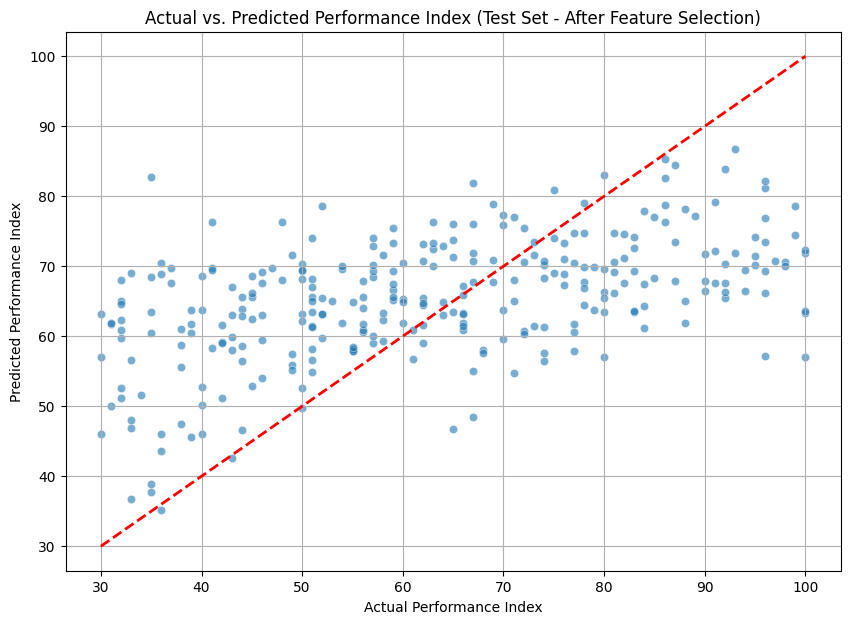

/tmp/ipython-input-20-1073559233.py:203: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')


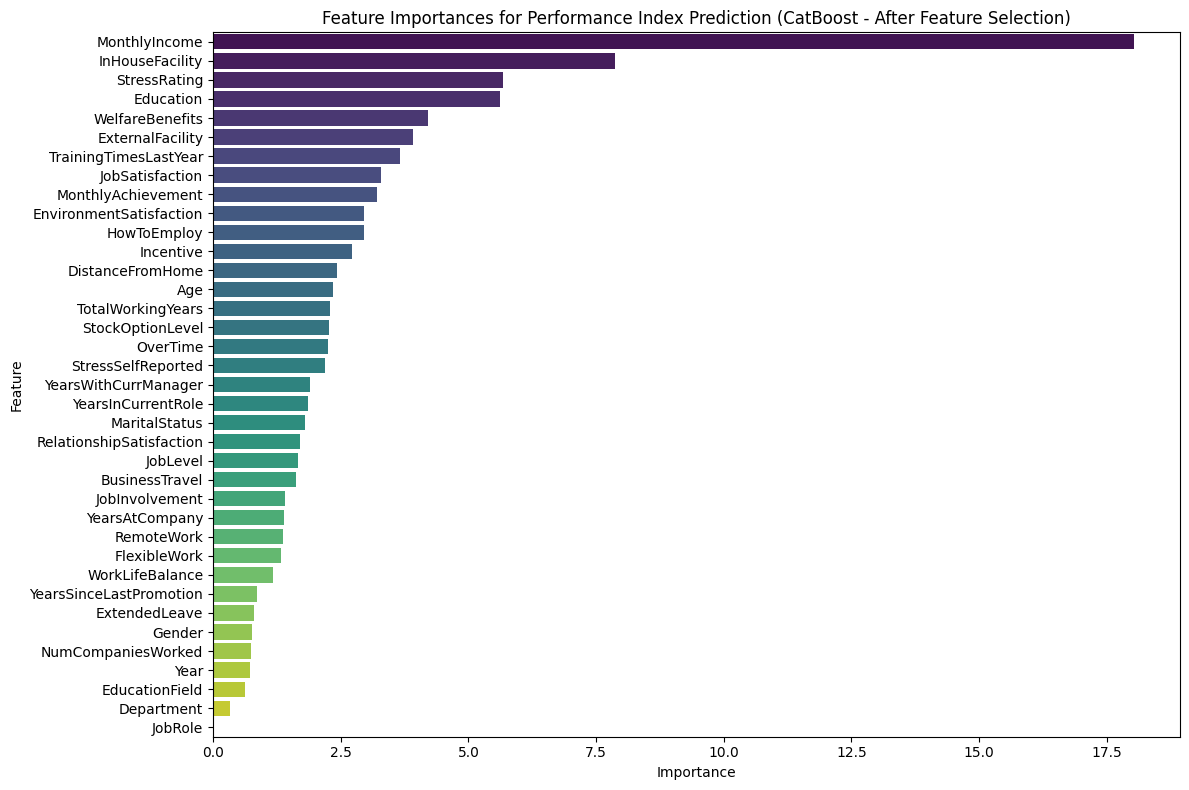

In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor # CatBoostRegressorをインポート
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 特徴量とターゲット変数の定義
# Define features (X) and target variable (y)
# 'PerformanceIndex'が予測したいターゲット変数です。
# 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18' は、
# すべての従業員で同じ値であるか、一意の識別子であるため、特徴量から除外します。
# 'PerformanceRating' は 'PerformanceIndex' と非常に高い相関があるため、
# モデルが過学習するのを避けるために特徴量から除外します。
X = df.drop(['PerformanceIndex', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18', 'PerformanceRating'], axis=1)
y = df['PerformanceIndex']

# 数値特徴量とカテゴリ特徴量の特定 (初期の全特徴量)
# Identify numerical and categorical features (initial full set)
initial_numerical_features = X.select_dtypes(include=np.number).columns.tolist()
initial_categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\n初期の数値特徴量: {initial_numerical_features}") # Initial numerical features:
print(f"初期のカテゴリ特徴量: {initial_categorical_features}") # Initial categorical features:

# === 特徴量選択のための最初のモデル訓練と重要度取得 (CatBoost) ===
# First model training and importance extraction for feature selection (CatBoost)

# 前処理パイプラインの作成 (全特徴量用)
# CatBoostはカテゴリ特徴量を直接扱えるため、OneHotEncoderは不要です。
# 数値特徴量にはStandardScalerを適用し、カテゴリ特徴量はそのままパススルーします。
preprocessor_initial = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), initial_numerical_features)
    ],
    remainder='passthrough' # 数値特徴量以外の列（カテゴリ特徴量）はそのまま残す
)

# CatBoostRegressorに渡すカテゴリ特徴量のインデックスを計算
# ColumnTransformerの出力順序: 数値特徴量 (initial_numerical_features) の後、残りの特徴量 (initial_categorical_features)
# Calculate the indices of categorical features to pass to CatBoostRegressor.
# ColumnTransformer output order: numerical features (initial_numerical_features) first,
# then remaining features (initial_categorical_features).
transformed_cols_order_initial = initial_numerical_features + [col for col in X.columns if col in initial_categorical_features]
cat_feature_indices_initial_for_catboost = [
    transformed_cols_order_initial.index(col)
    for col in initial_categorical_features
]

# CatBoostRegressorモデルの構築 (全特徴量用)
# CatBoostRegressorを使用し、cat_features引数でカテゴリ特徴量の列名を指定します。
model_initial = Pipeline(steps=[('preprocessor', preprocessor_initial),
                                ('regressor', CatBoostRegressor(
                                    iterations=100,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='RMSE',
                                    eval_metric='RMSE',
                                    random_seed=42,
                                    verbose=0, # 訓練中の出力を抑制
                                    cat_features=cat_feature_indices_initial_for_catboost # カテゴリ特徴量のインデックスを指定
                                ))])

# モデルの訓練 (全特徴量)
# Train the model (all features)
print("\n特徴量選択のために初期モデルを訓練中 (CatBoostRegressor)...") # Training initial model for feature selection (CatBoostRegressor)...
model_initial.fit(X, y)
print("初期モデルの訓練が完了しました。") # Initial model training complete.

# 特徴量の重要度を取得
# Get feature importances
try:
    # CatBoostRegressorから直接特徴量の重要度を取得
    importances_initial = model_initial.named_steps['regressor'].get_feature_importance()
    # 特徴量名は元のXの列名と一致する (ColumnTransformerの出力順序に合わせる)
    feature_names_initial = transformed_cols_order_initial
    feature_importances_initial = pd.Series(importances_initial, index=feature_names_initial).sort_values(ascending=False)

    print("\n初期モデルの特徴量の重要度:") # Feature importances of initial model:
    print(feature_importances_initial)

    # 重要度が0.01以上の特徴量を選択
    # Select features with importance greater than or equal to 0.01
    final_selected_features = feature_importances_initial[feature_importances_initial >= 0.01].index.tolist()

    print(f"\n最終的に選択された元の特徴量: {final_selected_features}") # Final selected original features:

    # 選択された特徴量でXを更新
    # Update X with selected features
    X_selected = X[final_selected_features]

except Exception as e:
    print(f"\n特徴量選択中にエラーが発生しました: {e}") # Error during feature selection:
    print("すべての特徴量を使用して続行します。") # Continuing with all features.
    # エラーが発生した場合、すべての特徴量を使用し続ける
    X_selected = X
    final_selected_features = X.columns.tolist()


# === 選択された特徴量でモデルを再訓練 (CatBoost) ===
# Re-train the model with selected features (CatBoost)

# 数値特徴量とカテゴリ特徴量の再特定 (選択された特徴量のみ)
# Re-identify numerical and categorical features (only selected features)
numerical_features_selected = X_selected.select_dtypes(include=np.number).columns.tolist()
categorical_features_selected = X_selected.select_dtypes(include='object').columns.tolist()

print(f"\n選択後の数値特徴量: {numerical_features_selected}") # Numerical features after selection:
print(f"選択後のカテゴリ特徴量: {categorical_features_selected}") # Categorical features after selection:

# 前処理パイプラインの再作成 (選択された特徴量用)
# 数値特徴量にStandardScalerを適用し、カテゴリ特徴量はそのままパススルー
preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected)
    ],
    remainder='passthrough'
)

# CatBoostRegressorに渡すカテゴリ特徴量のインデックスを計算 (選択された特徴量用)
transformed_cols_order_final = numerical_features_selected + [col for col in X_selected.columns if col in categorical_features_selected]
cat_feature_indices_final_for_catboost = [
    transformed_cols_order_final.index(col)
    for col in categorical_features_selected
]

# モデルの構築（パイプラインに前処理とCatBoostRegressorを結合）
model_final = Pipeline(steps=[('preprocessor', preprocessor_final),
                              ('regressor', CatBoostRegressor(
                                  iterations=100,
                                  learning_rate=0.1,
                                  depth=6,
                                  loss_function='RMSE',
                                  eval_metric='RMSE',
                                  random_seed=42,
                                  verbose=0,
                                  cat_features=cat_feature_indices_final_for_catboost # 選択されたカテゴリ特徴量のインデックスを指定
                              ))])

# データを訓練セットとテストセットに分割 (選択されたXを使用)
# Split data into training and testing sets (using selected X)
X_train_final, X_test_final, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"\n訓練セットのサイズ (選択後): {X_train_final.shape[0]}行") # Training set size (after selection): <num_rows> rows
print(f"テストセットのサイズ (選択後): {X_test_final.shape[0]}行") # Test set size (after selection): <num_rows> rows

# モデルの訓練 (選択された特徴量)
# Train the model (selected features)
print("\n選択された特徴量でモデルを訓練中 (CatBoostRegressor)...") # Training model with selected features (CatBoostRegressor)...
model_final.fit(X_train_final, y_train)
print("モデルの訓練が完了しました。") # Model training complete.

# テストセットでの予測
# Make predictions on the test set
y_pred_final = model_final.predict(X_test_final)

# モデルの評価
# Evaluate the model
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("\nモデル評価結果 (テストセット - 特徴量選択後):") # Model Evaluation Results (Test Set - After Feature Selection):
print(f"平均絶対誤差 (MAE): {mae_final:.2f}") # Mean Absolute Error (MAE):
print(f"平均二乗誤差 (MSE): {mse_final:.2f}") # Mean Squared Error (MSE):
print(f"二乗平均平方根誤差 (RMSE): {rmse_final:.2f}") # Root Mean Squared Error (RMSE):
print(f"決定係数 (R-squared): {r2_final:.2f}") # R-squared:

# クロスバリデーションによるモデル評価 (選択された特徴量)
# Model evaluation using Cross-Validation (selected features)
print("\nクロスバリデーションによるモデル評価 (R-squared - 特徴量選択後):") # Model Evaluation using Cross-Validation (R-squared - After Feature Selection):
cv_scores_final = cross_val_score(model_final, X_selected, y, cv=5, scoring='r2')
print(f"各分割でのR-squaredスコア: {cv_scores_final}") # R-squared scores for each fold:
print(f"R-squaredの平均: {cv_scores_final.mean():.2f}") # Mean R-squared:
print(f"R-squaredの標準偏差: {cv_scores_final.std():.2f}") # Standard Deviation of R-squared:

# 予測結果の可視化 (実測値 vs 予測値 - 特徴量選択後)
# Visualize predictions (Actual vs. Predicted - After Feature Selection)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # 理想的な予測を示す対角線
plt.title('Actual vs. Predicted Performance Index (Test Set - After Feature Selection)') # 実測値 vs 予測値 (パフォーマンス指標) (テストセット - 特徴量選択後)
plt.xlabel('Actual Performance Index') # 実測パフォーマンス指標
plt.ylabel('Predicted Performance Index') # 予測パフォーマンス指標
plt.grid(True)
plt.show()

# 特徴量の重要度 (CatBoostRegressor - 選択された特徴量)
# Feature Importance (CatBoostRegressor - Selected Features)
try:
    importances_final = model_final.named_steps['regressor'].get_feature_importance()
    # CatBoostのget_feature_importance()は、ColumnTransformerの出力順序に対応する
    feature_names_final = transformed_cols_order_final # 変換後の最終的な列順序を使用
    feature_importances_final = pd.Series(importances_final, index=feature_names_final).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')
    plt.title('Feature Importances for Performance Index Prediction (CatBoost - After Feature Selection)') # パフォーマンス指標予測における特徴量の重要度 (CatBoost - 特徴量選択後)
    plt.xlabel('Importance') # 重要度
    plt.ylabel('Feature') # 特徴量
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\n特徴量の重要度の表示中にエラーが発生しました: {e}") # Error displaying feature importances:


特徴量エンジニアリングを実行中...
特徴量エンジニアリングが完了しました。新しい特徴量:
   Satisfaction_Engagement  Experience_Level  Promotion_Stagnation  \
0                       12                16              0.000000   
1                        4                20              0.090909   
2                        6                 7              0.000000   
3                        9                 8              0.333333   
4                        6                 6              0.666667   

   Income_Per_Level  Years_In_Role_Ratio  
0       1741.333333             0.571429  
1       2287.666667             0.636364  
2       3806.000000             0.000000  
3       5622.500000             0.777778  
4       1514.500000             0.666667  

初期の数値特徴量: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyAchievement', 'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYea

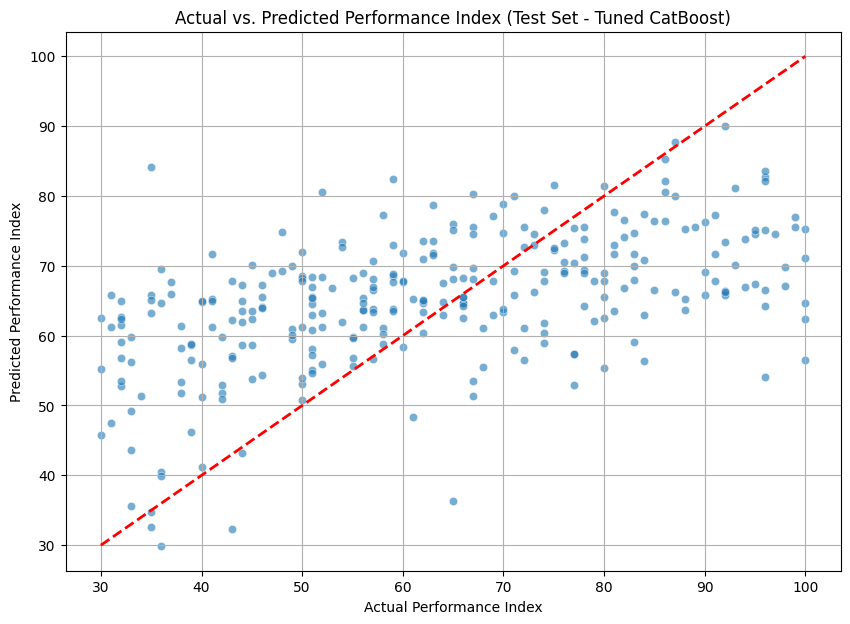

/tmp/ipython-input-24-4281639310.py:214: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')


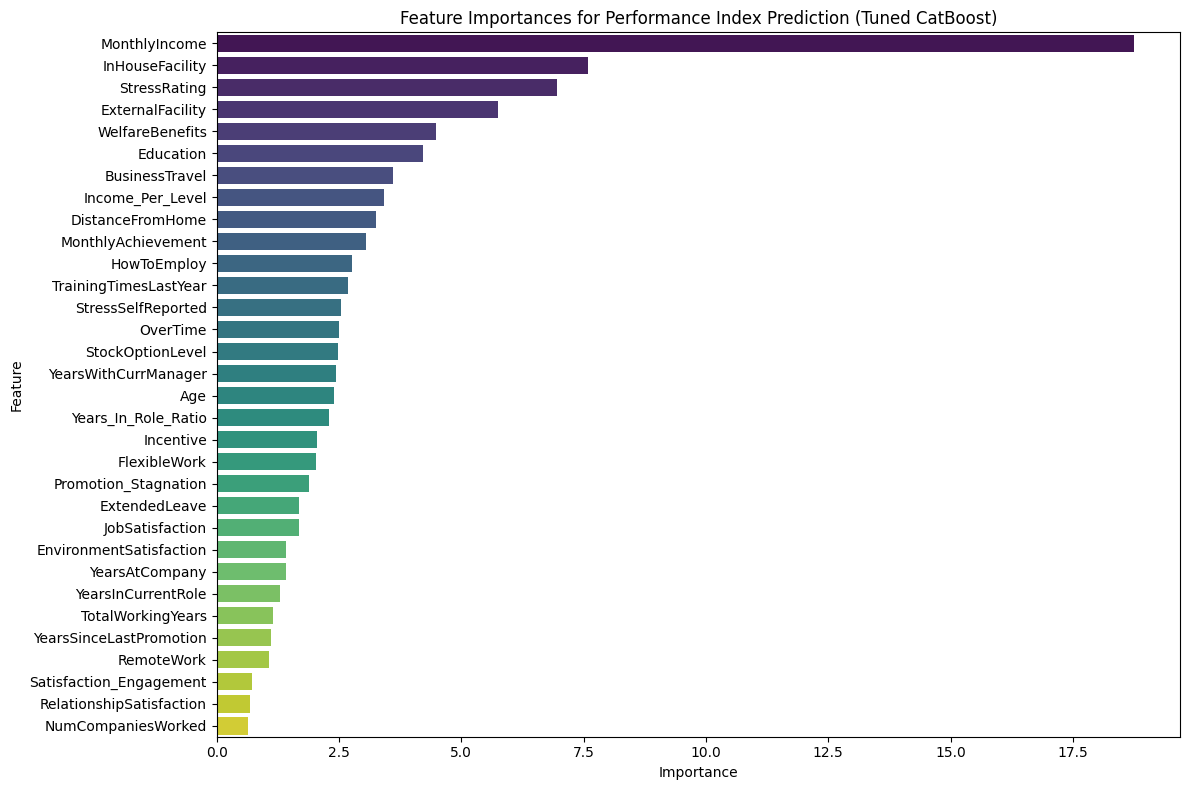

In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === 特徴量エンジニアリング ===
# Feature Engineering
print("\n特徴量エンジニアリングを実行中...") # Performing Feature Engineering...

# 1. 満足度とエンゲージメントの相互作用 (Interaction between Satisfaction and Engagement)
# 仕事満足度と仕事への関与度が高いほどパフォーマンスに影響すると仮定
# Assume higher job satisfaction and involvement lead to better performance
df['Satisfaction_Engagement'] = df['JobSatisfaction'] * df['JobInvolvement']

# 2. 経験と職務レベルの相互作用 (Interaction between Experience and Job Level)
# 経験年数と職務レベルが高いほどパフォーマンスに影響すると仮定
# Assume higher total working years and job level lead to better performance
df['Experience_Level'] = df['TotalWorkingYears'] * df['JobLevel']

# 3. 昇進停滞の割合 (Proportion of Promotion Stagnation)
# 現在の会社での勤続年数に対して、最後に昇進してからの年数の割合
# A higher ratio might indicate stagnation, potentially affecting performance
df['Promotion_Stagnation'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 1) # +1 to avoid division by zero

# 4. 職務レベルあたりの月収 (Monthly Income per Job Level)
# 職務レベルに応じた収入の適切さを測る指標
# A higher income per level might correlate with better performance or satisfaction
df['Income_Per_Level'] = df['MonthlyIncome'] / (df['JobLevel'] + 1) # +1 to avoid division by zero

# 5. 現在の役割での勤続年数の割合 (Proportion of Years in Current Role)
# 会社全体での勤続年数に対して、現在の役割での勤続年数の割合
# A higher ratio might indicate stability or deep expertise in current role
df['Years_In_Role_Ratio'] = df['YearsInCurrentRole'] / (df['YearsAtCompany'] + 1) # +1 to avoid division by zero

print("特徴量エンジニアリングが完了しました。新しい特徴量:") # Feature Engineering complete. New features:
print(df[['Satisfaction_Engagement', 'Experience_Level', 'Promotion_Stagnation', 'Income_Per_Level', 'Years_In_Role_Ratio']].head())

# 特徴量とターゲット変数の定義
# Define features (X) and target variable (y)
# 'PerformanceIndex'が予測したいターゲット変数です。
# 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18' は、
# すべての従業員で同じ値であるか、一意の識別子であるため、特徴量から除外します。
# 'PerformanceRating' は 'PerformanceIndex' と非常に高い相関があるため、
# モデルが過学習するのを避けるために特徴量から除外します。
X = df.drop(['PerformanceIndex', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18', 'PerformanceRating'], axis=1)
y = df['PerformanceIndex']

# 数値特徴量とカテゴリ特徴量の特定 (初期の全特徴量)
# Identify numerical and categorical features (initial full set)
initial_numerical_features = X.select_dtypes(include=np.number).columns.tolist()
initial_categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\n初期の数値特徴量: {initial_numerical_features}") # Initial numerical features:
print(f"初期のカテゴリ特徴量: {initial_categorical_features}") # Initial categorical features:

# === 特徴量選択のための最初のモデル訓練と重要度取得 (CatBoost) ===
# First model training and importance extraction for feature selection (CatBoost)

# 前処理パイプラインの作成 (全特徴量用)
preprocessor_initial = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), initial_numerical_features)
    ],
    remainder='passthrough'
)

# CatBoostRegressorに渡すカテゴリ特徴量のインデックスを計算
transformed_cols_order_initial = initial_numerical_features + [col for col in X.columns if col in initial_categorical_features]
cat_feature_indices_initial_for_catboost = [
    transformed_cols_order_initial.index(col)
    for col in initial_categorical_features
]

model_initial = Pipeline(steps=[('preprocessor', preprocessor_initial),
                                ('regressor', CatBoostRegressor(
                                    iterations=100,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='RMSE',
                                    eval_metric='RMSE',
                                    random_seed=42,
                                    verbose=0,
                                    cat_features=cat_feature_indices_initial_for_catboost
                                ))])

print("\n特徴量選択のために初期モデルを訓練中 (CatBoostRegressor)...") # Training initial model for feature selection (CatBoostRegressor)...
model_initial.fit(X, y)
print("初期モデルの訓練が完了しました。") # Initial model training complete.

# 特徴量の重要度を取得
try:
    importances_initial = model_initial.named_steps['regressor'].get_feature_importance()
    feature_names_initial = transformed_cols_order_initial
    feature_importances_initial = pd.Series(importances_initial, index=feature_names_initial).sort_values(ascending=False)

    print("\n初期モデルの特徴量の重要度:") # Feature importances of initial model:
    print(feature_importances_initial)

    final_selected_features = feature_importances_initial[feature_importances_initial >= 1].index.tolist()

    print(f"\n最終的に選択された元の特徴量: {final_selected_features}") # Final selected original features:

    X_selected = X[final_selected_features]

except Exception as e:
    print(f"\n特徴量選択中にエラーが発生しました: {e}") # Error during feature selection:
    print("すべての特徴量を使用して続行します。") # Continuing with all features.
    X_selected = X
    final_selected_features = X.columns.tolist()


# === 選択された特徴量でモデルを再訓練 (CatBoost) ===
# Re-train the model with selected features (CatBoost)

numerical_features_selected = X_selected.select_dtypes(include=np.number).columns.tolist()
categorical_features_selected = X_selected.select_dtypes(include='object').columns.tolist()

print(f"\n選択後の数値特徴量: {numerical_features_selected}") # Numerical features after selection:
print(f"選択後のカテゴリ特徴量: {categorical_features_selected}") # Categorical features after selection:

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected)
    ],
    remainder='passthrough'
)

transformed_cols_order_final = numerical_features_selected + [col for col in X_selected.columns if col in categorical_features_selected]
cat_feature_indices_final_for_catboost = [
    transformed_cols_order_final.index(col)
    for col in categorical_features_selected
]

# モデルの構築（パイプラインに前処理とCatBoostRegressorを結合）
base_model = Pipeline(steps=[('preprocessor', preprocessor_final),
                              ('regressor', CatBoostRegressor(
                                  loss_function='RMSE',
                                  eval_metric='RMSE',
                                  random_seed=42,
                                  verbose=0,
                                  cat_features=cat_feature_indices_final_for_catboost
                              ))])

# ハイパーパラメータグリッドの定義
param_grid = {
    'regressor__iterations': [100, 200, 300],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__depth': [4, 6, 8]
}

# GridSearchCVのセットアップ
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=1, n_jobs=-1)

# データを訓練セットとテストセットに分割 (選択されたXを使用)
X_train_final, X_test_final, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# GridSearchCVを実行
print("\nハイパーパラメータチューニングを実行中 (GridSearchCV)...") # Performing hyperparameter tuning (GridSearchCV)...
grid_search.fit(X_train_final, y_train)
print("ハイパーパラメータチューニングが完了しました。") # Hyperparameter tuning complete.

# 最適なモデルを取得
model_final = grid_search.best_estimator_
print(f"\n最適ハイパーパラメータ: {grid_search.best_params_}") # Best hyperparameters:
print(f"GridSearchCVでのベストスコア (R-squared): {grid_search.best_score_:.2f}") # Best score (R-squared) from GridSearchCV:

# テストセットでの予測
y_pred_final = model_final.predict(X_test_final)

# モデルの評価
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test, y_pred_final)

print("\nモデル評価結果 (テストセット - 特徴量選択 & ハイパーパラメータチューニング後):") # Model Evaluation Results (Test Set - After Feature Selection & Hyperparameter Tuning):
print(f"平均絶対誤差 (MAE): {mae_final:.2f}") # Mean Absolute Error (MAE):
print(f"平均二乗誤差 (MSE): {mse_final:.2f}") # Mean Squared Error (MSE):
print(f"二乗平均平方根誤差 (RMSE): {rmse_final:.2f}") # Root Mean Squared Error (RMSE):
print(f"決定係数 (R-squared): {r2_final:.2f}") # R-squared:

# クロスバリデーションによるモデル評価 (選択された特徴量 & 最適パラメータ)
print("\nクロスバリデーションによるモデル評価 (R-squared - 特徴量選択 & 最適パラメータ後):") # Model Evaluation using Cross-Validation (R-squared - After Feature Selection & Optimal Parameters):
cv_scores_final = cross_val_score(model_final, X_selected, y, cv=5, scoring='r2')
print(f"各分割でのR-squaredスコア: {cv_scores_final}") # R-squared scores for each fold:
print(f"R-squaredの平均: {cv_scores_final.mean():.2f}") # Mean R-squared:
print(f"R-squaredの標準偏差: {cv_scores_final.std():.2f}") # Standard Deviation of R-squared:

# 予測結果の可視化 (実測値 vs 予測値 - 特徴量選択 & ハイパーパラメータチューニング後)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Performance Index (Test Set - Tuned CatBoost)') # 実測値 vs 予測値 (パフォーマンス指標) (テストセット - チューニング済みCatBoost)
plt.xlabel('Actual Performance Index') # 実測パフォーマンス指標
plt.ylabel('Predicted Performance Index') # 予測パフォーマンス指標
plt.grid(True)
plt.show()

# 特徴量の重要度 (CatBoostRegressor - 選択された特徴量 & 最適パラメータ)
try:
    importances_final = model_final.named_steps['regressor'].get_feature_importance()
    feature_names_final = transformed_cols_order_final
    feature_importances_final = pd.Series(importances_final, index=feature_names_final).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances_final.values, y=feature_importances_final.index, palette='viridis')
    plt.title('Feature Importances for Performance Index Prediction (Tuned CatBoost)') # パフォーマンス指標予測における特徴量の重要度 (チューニング済みCatBoost)
    plt.xlabel('Importance') # 重要度
    plt.ylabel('Feature') # 特徴量
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\n特徴量の重要度の表示中にエラーが発生しました: {e}") # Error displaying feature importances: